# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Содержание

[Обзор данных](#review)

[Предобработка данных](#pretreatment)

[Добавление столбцов с новыми характеристиками](#columns_adding)

[Исследовательский анализ](#analysis)

- [Построение гистограмм для основных параметров](#hystograms)
- [Анализ времени продажи квартиры](#time_analysis)
- [Удаление выбросов и редких значений](#ejections)
- [Изучение влияния на цену основных факторов](#price_factors)
- [Выявление населенных пунктов с самой высокой и низкой стоимостью жилья](#max_min_price)
- [Выделение центральной зоны](#center_zone)
- [Анализ стоимости жилья в центральной зоне](#center_analysis)

[Общий вывод исследования](#conclusion)


### Шаг 1. Откройте файл с данными и изучите общую информацию. <a name="review"></a>

Импорт библиотек, которые потребуются для выполнения исследования:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Считывание файла с данными в датафрейм real_estate:

In [4]:
real_estate = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

Получение данных о первых 15 строках таблицы:

In [5]:
real_estate.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Общая информация о данных таблицы:

In [6]:
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Рассмотрим полученную информацию.

В таблице **22** столбца:

- **total_images** — число фотографий квартиры в объявлении / целочисл. тип данных
- **last_price** — цена на момент снятия с публикации / числа с плав.точкой
- **total_area** — площадь квартиры в квадратных метрах (м²) / числа с плав.точкой
- **first_day_exposition** — дата публикации / строковый тип данных 
- **rooms** — число комнат / целочисл. тип данных
- **ceiling_height** — высота потолков (м) / числа с плав.точкой
- **floors_total** — всего этажей в доме / числа с плав.точкой
- **living_area** — жилая площадь в квадратных метрах(м²) / числа с плав.точкой
- **floor** — этаж / целочисл. тип данных
- **is_apartment** — апартаменты / строковый тип данных
- **studio** — квартира-студия / булев тип данных
- **open_plan** — свободная планировка / булев тип данных
- **kitchen_area** — площадь кухни в квадратных метрах (м²) / числа с плав.точкой
- **balcony** — число балконов / числа с плав.точкой
- **locality_name** — название населённого пункта / строковый тип данных
- **airports_nearest** — расстояние до ближайшего аэропорта в метрах (м) / числа с плав.точкой
- **cityCenters_nearest** — расстояние до центра города (м) / числа с плав.точкой
- **parks_around3000** — число парков в радиусе 3 км / числа с плав.точкой
- **parks_nearest** — расстояние до ближайшего парка (м) / числа с плав.точкой
- **ponds_around3000** — число водоёмов в радиусе 3 км / числа с плав.точкой
- **ponds_nearest** — расстояние до ближайшего водоёма (м) / числа с плав.точкой
- **days_exposition** — сколько дней было размещено объявление (от публикации до снятия) / числа с плав.точкой

и **23699** строк, каждая из которых сожержит информацию об одном объявлении.

В следующих столбцах количество значений совпадает с общим числом строк в таблице:

- **total_images** 
- **last_price**
- **total_area**
- **first_day_exposition**
- **rooms**
- **floor**
- **studio**
- **open_plan** 

В остальных столбцах имеются пропуски.

### Вывод

Каждая строка таблицы содержит сведения о квартире, выставленной на продажу в Санкт-Петербурге и соседних населенных пунктах: стоимость, площадь, количество комнат, расстояние до аэропорта и пр.

Задачи, которые нужно решить, прежде чем приступить к поиску ответов на поставленные вопросы:

- обработка пропусков данных в столбцах;
- изменение типов данных в столбцах;
- добавление в таблицу новых столбцов с более наглядными для сравнения характеристиками (цену квадратного метра, соотношение жилой и общей площадей и пр.).

### Шаг 2. Предобработка данных <a name="pretreatment"></a>

Будем заполнять пропуски, а также менять тип данных там, где это необходимо.

Рассмотрим поочередно столбцы с пропущенными значениями.

**1. ceiling_height — высота потолков (м):**

In [7]:
real_estate['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Указано всего 14504 значения из 23699, отсутствует 9195 (38,7%).  

Вообще говоря, для домов разных серий характерна своя высота квартир. Для новостроек она составляет 2,7 м, для "хрущевок" - 2,5 м, для "сталинок" - 3-3,5 м, для "брежневок" и панельных домов - 2,5-2,7 м. По этой причине замена всех пропусков на среднее или медианное значение по таблице будет некорректной. Поскольку ничего похожего на категорию "тип дома" в исходных данных нет, оставим пропуски без изменений.  

Обратим внимание на неправдоподобные минимальное (1.0 м.) и максимальное (100.0 м.) значения. Проверим, соответствуют ли реальности остальные. Будем считать минимально допустимой высотой потолков 2,2 м. (если ниже, помещение не признают жилым), а максимальной - 10,0 м. (если квартира в лофте или пентхаусе).

In [8]:
real_estate.query('ceiling_height < 2.2 or ceiling_height > 10.0')['ceiling_height'].shape[0]

39

Таких квартир всего 39. Это 0,2% из всех имеющихся значений, и в силу немногочисленности ими можно пренебречь. Поскольку пропуски в рассматриваемом столбце остаются нетронутыми, для удобства заменим и неправдоподобные значения на NaN:

In [9]:
real_estate.loc[(real_estate['ceiling_height'] < 2.2) | (real_estate['ceiling_height'] > 10.0), 'ceiling_height'] = None

In [10]:
real_estate.query('ceiling_height < 2.2 or ceiling_height > 10.0')['ceiling_height'].shape[0]

0

**2. floors_total — всего этажей в доме:**

In [11]:
real_estate['floors_total'].describe()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Указано 23574 значения из 23699, это 99%. Сначала уберем аномальные значения, зная, что в Санкт-Петербурге самый высокий жилой дом состоит из 37 этажей. Таких строк всего две:

In [12]:
real_estate.query('floors_total > 37')['floors_total'].shape[0]

2

In [13]:
real_estate.loc[real_estate['floors_total'] > 37, 'floors_total'] = None

Заменить пропуски без существенного искажения данных можно на медианное значение. Поскольку данные об этаже, на котором находится квартира, в дальнейшем будут объединены в три категории - первый, последний и другой, - то нет принципиальной разницы, какова средняя этажность в том или ином районе (квартир в одноэтажных домах даже в пригородах Санкт-Петербурга на порядки меньше, чем в многоэтажных), медианное значение будет отличаться от первого или последнего этажа независимо от других факторов.

Заменим все пропуски на медианное значение:

In [14]:
real_estate['floors_total'] = real_estate['floors_total'].fillna(real_estate['floors_total'].median())

In [15]:
real_estate['floors_total'].describe()

count    23699.000000
mean        10.663783
std          6.572695
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         37.000000
Name: floors_total, dtype: float64

Все значения заполнены. Наконец, поменяем тип данных для имеющихся значений на целочисленный:

In [16]:
real_estate['floors_total'] = real_estate['floors_total'].astype('int')

**3. living_area — жилая площадь в квадратных метрах(м²):**

In [17]:
real_estate['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

Указано 21757 значений из 23699, что составляет 91,8%. Помимо пропусков встречаются неправдоподобно низкие значения: по санитарным нормам жилая площадь не может быть ниже 6 кв. м на человека. В данных явно содержатся опечатки:

In [18]:
real_estate.loc[real_estate['living_area'] < 6, ['total_area', 'living_area']]

,total_area,living_area
3242,41.0,3.0
13915,52.0,2.0
17582,22.0,5.0
21758,23.0,2.0
21943,77.6,5.4
23574,139.0,3.0


Заполним пропуски, а также изменим значения, меньшие минимально возможных. Отношение жилой площади к общей в квартирах, как правило, принимает похожие значения. Тогда, зная среднее значение этого отношения и общую площадь (в столбце **total_area** нет пропусков), можно восстановить и столбец **living_area**:

In [19]:
ratio = []
ratio = real_estate['living_area'] / real_estate['total_area']

In [20]:
ratio.mean()

0.5647655216993234

In [21]:
real_estate.loc[real_estate['living_area'] < 6, 'living_area'] = real_estate['total_area'] * ratio.mean()

In [22]:
real_estate['living_area'] = real_estate['living_area'].fillna(real_estate['total_area'] * ratio.mean())

In [23]:
real_estate['living_area'].describe()

count    23699.000000
mean        34.570070
std         22.324404
min          6.000000
25%         19.000000
50%         30.000000
75%         42.100000
max        409.700000
Name: living_area, dtype: float64

Пропуски и некорректные значения устранены.

**4. is_apartment - апартаменты**

In [24]:
real_estate['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

In [25]:
real_estate['is_apartment'].dtype

dtype('O')

Столбец содержит 2775 значений, это всего 11,7%. Заполненные значения представляют из себя True или False, однако тип данных - object. Поменяем его на более логичный булев тип:

In [26]:
real_estate['is_apartment'] = real_estate['is_apartment'].astype('bool')

In [27]:
real_estate['is_apartment'].describe()

count     23699
unique        2
top        True
freq      20974
Name: is_apartment, dtype: object

Согласно [данным газеты](https://www.dp.ru/a/2019/11/13/Ne_nasitilsja) "Деловой Петербург", доля апартаментов на рынке жилья "Санкт-Петербурга" невелика и составляет около 8%. В то же время в исходной таблице нет никакой информации, которая помогла бы определить, является та или иная квартира апартаментами или нет. Поэтому пропуски будет целесообразней оставить незаполненными, тем более что для ответа на поставленные вопросы этот столбец не играет роли.

**5. kitchen_area — площадь кухни в квадратных метрах (м²)** 

In [28]:
real_estate['kitchen_area'].describe()

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

Указано 21421 значений из 23699, это 90,3%. Площадь кухни - более стандартизированная величина по сравнению с жилой площадью, и пропуски можно заполнить средним значением:

In [29]:
real_estate['kitchen_area'] = real_estate['kitchen_area'].fillna(real_estate['kitchen_area'].mean())

**6. balcony — число балконов**

In [30]:
real_estate['balcony'].describe()

count    12180.000000
mean         1.150082
std          1.071300
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: balcony, dtype: float64

Не указано 11519 значений из 23699 (48%). 

In [31]:
real_estate['balcony'].value_counts()

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

Если предположить, что все пропуски в данных содержатся из-за того, что в картире просто нет балкона, то общее количество таких квартир будет 3758 уже учтенных и 11519 пропущенных, всего 15277 (64,4% от общего числа). Это многовато (в интернете встречаются данные ([здесь](https://www.gdeetotdom.ru/articles/2048007-2020-05-26-bez-vyihoda-v-kazhdoj-tretej-novostrojke-komfort-klassa-otsutstvuyut-kv/) и  и [здесь](https://www.oknamedia.ru/novosti/kvartira-bez-balkona-posle-pandemii-byt-ili-ne-byt-51060)) о 30-45% квартир без балконов). Для строк с пропусками будем считать, что если в квартире более двух комнат, то один балкон тоже присутствует. Для остальных квартир заполним пропуски нулями:

In [32]:
real_estate.loc[(real_estate['rooms'] < 2) & (real_estate['balcony'].isna()), 'balcony'] = 0

In [33]:
real_estate.loc[(real_estate['rooms'] >= 2) & (real_estate['balcony'].isna()), 'balcony'] = 1

In [34]:
real_estate['balcony'].count()

23699

In [35]:
real_estate['balcony'].value_counts()

1.0    11824
0.0     7648
2.0     3659
5.0      304
4.0      183
3.0       81
Name: balcony, dtype: int64

Пропуски ушли, а количество квартир без балконов (32,2%) выглядит правдоподобно.

**7. locality_name — название населённого пункта**

In [36]:
real_estate['locality_name'].isna().sum()

49

In [37]:
real_estate['locality_name'].value_counts().head()

Санкт-Петербург    15721
посёлок Мурино       522
посёлок Шушары       440
Всеволожск           398
Пушкин               369
Name: locality_name, dtype: int64

Указанных пропусков всего 49 (0,2%), при этом две трети всех квартир находятся в Санкт-Петербурге. Поэтому можно без потери точности заполнить недостающие значения на "Санкт-Петербург".

In [38]:
real_estate.loc[real_estate['locality_name'].isna(), 'locality_name'] = 'Санкт-Петербург'

**8. airports_nearest — расстояние до ближайшего аэропорта в метрах (м)**

Сначала для более удобного восприятия переведем метры в километры:

In [39]:
real_estate['airports_nearest'] = real_estate['airports_nearest'] / 1000

In [40]:
real_estate['airports_nearest'].round(2)

0        18.86
1        12.82
2        21.74
3        28.10
4        31.86
         ...  
23694    24.66
23695      NaN
23696      NaN
23697    39.14
23698      NaN
Name: airports_nearest, Length: 23699, dtype: float64

In [41]:
real_estate['airports_nearest'].describe()

count    18157.000000
mean        28.793672
std         12.630881
min          0.000000
25%         18.585000
50%         26.726000
75%         37.273000
max         84.869000
Name: airports_nearest, dtype: float64

Заполнено всего 18157 строк из 23699 (76,6%). Чтобы уменьшить количество пропусков, можно указать расстояние, зная населенный пункт, в котором находится квартира. Значимый аэропорт в Санкт-Петербурге всего один - Пулково, поэтому примерное расстояние несложно определить по карте. 

In [42]:
real_estate.loc[real_estate['airports_nearest'].isna()]['locality_name'].value_counts().head(10)

посёлок Мурино             522
Всеволожск                 398
Гатчина                    307
деревня Кудрово            299
Выборг                     237
Кудрово                    173
деревня Новое Девяткино    144
Сертолово                  142
Кириши                     125
Сланцы                     112
Name: locality_name, dtype: int64

Внесем данные по пяти самым многочисленным (от 200 пропусков) группам (ближайший аэропорт к Выборгу не Пулково, а Лаппенранта):

In [43]:
real_estate.loc[(real_estate['airports_nearest'].isna()) & (real_estate['locality_name'] == 'посёлок Мурино'),\
                'airports_nearest'] = 43.74

In [44]:
real_estate.loc[(real_estate['airports_nearest'].isna()) & (real_estate['locality_name'] == 'Всеволожск'),\
                'airports_nearest'] = 46.70

In [45]:
real_estate.loc[(real_estate['airports_nearest'].isna()) & (real_estate['locality_name'] == 'Гатчина'),\
                'airports_nearest'] = 30.20

In [46]:
real_estate.loc[(real_estate['airports_nearest'].isna()) & (real_estate['locality_name'] == 'деревня Кудрово'),\
                'airports_nearest'] = 26.40

In [47]:
real_estate.loc[(real_estate['airports_nearest'].isna()) & (real_estate['locality_name'] == 'Выборг'),\
                'airports_nearest'] = 59.51

In [48]:
real_estate['airports_nearest'].describe()

count    19920.000000
mean        29.894300
std         12.954164
min          0.000000
25%         19.233750
50%         27.858500
75%         39.393000
max         84.869000
Name: airports_nearest, dtype: float64

Теперь внесенено 84% значений (результат улучшился на 7,5%). Остальные пропуски заполнять трудозатратно.

**9. cityCenters_nearest — расстояние до центра города (м)**

Сначала для более удобного восприятия переведем метры в километры:

In [49]:
real_estate['cityCenters_nearest'] = real_estate['cityCenters_nearest'] / 1000

In [50]:
real_estate['cityCenters_nearest'].round(2)

0        16.03
1        18.60
2        13.93
3         6.80
4         8.10
         ...  
23694     4.23
23695      NaN
23696      NaN
23697    10.36
23698      NaN
Name: cityCenters_nearest, Length: 23699, dtype: float64

In [51]:
real_estate['cityCenters_nearest'].describe()

count    18180.000000
mean        14.191278
std          8.608386
min          0.181000
25%          9.238000
50%         13.098500
75%         16.293000
max         65.968000
Name: cityCenters_nearest, dtype: float64

Заполнено 76,7% данных. Попробуем поступить так же, как и с расстояниями до ближайшего аэропорта:

In [52]:
real_estate.loc[real_estate['cityCenters_nearest'].isna()]['locality_name'].value_counts().head(10)

посёлок Мурино             522
Всеволожск                 398
Гатчина                    307
деревня Кудрово            299
Выборг                     237
Кудрово                    173
деревня Новое Девяткино    144
Сертолово                  142
Кириши                     125
Сланцы                     112
Name: locality_name, dtype: int64

Видим, что количество пропусков для таблицы выше точно такое же, как и в столбце **airports_nearest**. Это позволяет предположить, что данные о расстояниях (и далее количестве парков и прудов) рассчитаны автоматически. В основном пропущены значения по крупным населенным пунктам возле Санкт-Петербурга. Аналогично предыдущему пункту, внесем расстояния до тех населенных пунктов, где пропусков более 200:

In [53]:
real_estate.loc[(real_estate['cityCenters_nearest'].isna()) & (real_estate['locality_name'] == 'посёлок Мурино'),\
                'cityCenters_nearest'] = 16.40

In [54]:
real_estate.loc[(real_estate['cityCenters_nearest'].isna()) & (real_estate['locality_name'] == 'Всеволожск'),\
                'cityCenters_nearest'] = 25.10

In [55]:
real_estate.loc[(real_estate['cityCenters_nearest'].isna()) & (real_estate['locality_name'] == 'Гатчина'),\
                'cityCenters_nearest'] = 64.50

In [56]:
real_estate.loc[(real_estate['cityCenters_nearest'].isna()) & (real_estate['locality_name'] == 'деревня Кудрово'),\
                'cityCenters_nearest'] = 11.60

In [57]:
real_estate.loc[(real_estate['cityCenters_nearest'].isna()) & (real_estate['locality_name'] == 'Выборг'),\
                'cityCenters_nearest'] = 131.70

In [58]:
real_estate['cityCenters_nearest'].describe()

count    19943.000000
mean        16.598848
std         16.353205
min          0.181000
25%          9.841000
50%         13.492000
75%         16.802000
max        131.700000
Name: cityCenters_nearest, dtype: float64

Теперь внесенено 84,1% значений (результат улучшился на 7,4%). Остальные пропуски заполнять трудозатратно.

**10 - 13**

- **parks_around3000 — число парков в радиусе 3 км** 
- **parks_nearest — расстояние до ближайшего парка (м)**
- **ponds_around3000 — число водоёмов в радиусе 3 км**
- **ponds_nearest — расстояние до ближайшего водоёма (м)**

Не зная адресов квартир, заполнить пропущенные данные в указанных столбцах затруднительно. Кроме того они не играют роли для дальнейшего исследования, поэтому нет особого смысла в их обработке.

**14. days_exposition — сколько дней было размещено объявление (от публикации до снятия)**

In [59]:
real_estate['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

3181 пропуск (13,4%). Пропуски могут быть вызваны тем, что объявление о продаже еще не снято. В этом случае некорректно заменять их на среднее или медиану. Оставим столбец в исходном виде.

Прежде чем переходить к исследованию, проверим оставшиеся столбцы (те, что были без пропусков) на наличие некорректных значений, а также изменим типы данных, где это необходимо.

**15. total_images — число фотографий квартиры в объявлении**

In [60]:
real_estate['total_images'].describe()

count    23699.000000
mean         9.858475
std          5.682529
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64

Все значения в пределах нормы, однако тип данных можно поменять на целочисленный:

In [61]:
real_estate['total_images'] = real_estate['total_images'].astype('int')

**16. last_price — цена на момент снятия с публикации**

In [62]:
real_estate['last_price'].describe().apply('{:.2f}'.format)

count        23699.00
mean       6541548.77
std       10887013.27
min          12190.00
25%        3400000.00
50%        4650000.00
75%        6800000.00
max      763000000.00
Name: last_price, dtype: object

Минимальное значение неправдоподобное - стоимость квартиры всего 12 190 р. Проверим, есть ли в выборке квартиры дешевле 300 000 р. (по таким ценам, к примеру, можно найти квартиру в районе Сланцев).

In [63]:
real_estate.query('last_price < 300000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190.0,109.0,2019-03-20T00:00:00,2,2.75,25,32.0,25,True,...,40.5,1.0,Санкт-Петербург,36.421,9.176,1.0,805.0,0.0,NaN,8.0


Такая квартира всего одна, находится в Санкт-Петербурге, ее площадь 109 кв.м. Вероятнее всего, стоимость указана в тысячах рублей, поэтому умножим цену на 1000 и получим адекватную цену:

In [64]:
real_estate.loc[real_estate['last_price'] < 300000, 'last_price'] = \
                                            real_estate.loc[real_estate['last_price'] < 300000] * 1000

Верхний порог стоимости квартир действительно имеет место на рынке.

**17. total_area — площадь квартиры в квадратных метрах (м²)**

In [65]:
real_estate['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

Граничные значения площади квартир адекватны.

**18. first_day_exposition — дата публикации** 

Поменяем в указанном столбце тип данных со строкового на даты:

In [66]:
real_estate['first_day_exposition'] = pd.to_datetime(real_estate['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [67]:
real_estate['first_day_exposition'].head()

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

**19. rooms — число комнат** 

In [68]:
real_estate['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Странно, что продаются квартиры с числом комнат, равным 0. Вероятно, это ошибка (возможно, указанное поле в объявлении было не заполнено).

In [69]:
real_estate.query('rooms == 0')['rooms'].value_counts()

0    197
Name: rooms, dtype: int64

Таких записей всего 147 (0,6%). Данные не сильно исказятся, если заменить 0 на среднее значение - 2 (оно же и медианное).

In [70]:
real_estate.loc[real_estate['rooms'] == 0, 'rooms'] = 2

In [71]:
real_estate.query('rooms == 0')['rooms'].value_counts()

Series([], Name: rooms, dtype: int64)

**20. floor — этаж** 

In [72]:
real_estate['floor'].describe()

count    23699.000000
mean         5.892358
std          4.885249
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

Все корректно - и граничные значения, и тип данных.

**21. studio — квартира-студия** 

In [73]:
real_estate['studio'].value_counts()

False    23550
True       149
Name: studio, dtype: int64

Данные корректны.

**22. open_plan — свободная планировка** 

In [74]:
real_estate['open_plan'].value_counts()

False    23632
True        67
Name: open_plan, dtype: int64

Данные корректны.

**Вывод**

В 14 столбцах таблицы были пропущены данные о квартирах. Часть пропусков заполнена значениями, подходящими логически (**ceiling_height**, **balcony**, **locality_name**, **airports_nearest**, **cityCenters_nearest**), часть - средними значениями (**floors_total**, **kitchen_area**). 

Исключены некорректные данные (**ceiling_height**, **floors_total**, **living_area**, **last_price**, **rooms**).

Изменен тип данных (**floors_total**, **days_exposition**, **total_images**, **first_day_exposition**).

Изменена размерность с метров на километры (**airports_nearest**, **cityCenters_nearest**).

Данные готовы к анализу.

### Шаг 3. Посчитайте и добавьте в таблицу <a name="columns_adding"></a>

Добавим в таблицу новые столбцы со следующей информацией:

- **price_for_sq_meter** — цена квадратного метра
- **publ_weekday** — день недели публикации объявления
- **publ_month** — месяц публикации объявления
- **publ_year** — год публикации объявления
- **floor_categ** — этаж квартиры; варианты — первый, последний, другой 
- **living_to_total** — соотношение жилой и общей площади
- **kitchen_to_total** — соотношение площади кухни к общей


**1. price_for_sq_meter — цена квадратного метра** 

In [75]:
real_estate['price_for_sq_meter'] = real_estate['last_price'] / real_estate['total_area']

In [76]:
real_estate['price_for_sq_meter'].describe().apply('{:.2f}'.format)

count      23699.00
mean       99426.37
std        50302.73
min         7962.96
25%        76599.67
50%        95000.00
75%       114256.33
max      1907500.00
Name: price_for_sq_meter, dtype: object

Средняя стоимость 1 кв. метра жилья - 99 426 р.

**2. publ_weekday — день недели публикации объявления**

In [77]:
real_estate['publ_weekday'] = real_estate['first_day_exposition'].dt.weekday_name

In [78]:
real_estate['publ_weekday'].head()

0    Thursday
1     Tuesday
2    Thursday
3      Friday
4     Tuesday
Name: publ_weekday, dtype: object

In [79]:
real_estate['publ_weekday'].isna().sum()

0

Все строки нового столбца **publ_weekday** заполнены днями недели публикации объявления.

**3. publ_month — месяц публикации объявления**

In [80]:
real_estate['publ_month'] = real_estate['first_day_exposition'].dt.month_name()

In [81]:
real_estate['publ_month'].head()

0       March
1    December
2      August
3        July
4        June
Name: publ_month, dtype: object

In [82]:
real_estate['publ_month'].isna().sum()

0

Все строки нового столбца **publ_month** заполнены месяцами публикации объявления.

**4. publ_year — год публикации объявления**

In [83]:
real_estate['publ_year'] = real_estate['first_day_exposition'].dt.year

In [84]:
real_estate['publ_year'].head()

0    2019
1    2018
2    2015
3    2015
4    2018
Name: publ_year, dtype: int64

In [85]:
real_estate['publ_year'].isna().sum()

0

Все строки нового столбца **publ_year** заполнены годом публикации объявления.

**5. floor_categ — этаж квартиры; варианты — первый, последний, другой**

Напишем функцию floor_type, которая сравнивает значение в столбце **floor** со значением в столбце **floors_total**, и создадим на основе ее применения новый столбец **floor_categ**, содержащий одну из катергорий этажа - первый, последний или другой. 

In [86]:
def floor_type(row):
    floor = row['floor']
    try:
        if floor == 1:
            return 'первый'
        if floor == row['floors_total']:
            return 'последний'
        if 1 < floor < row['floors_total']:
            return 'другой'
    except:
        print('В функцию переданы некорректные значения')
        

In [87]:
real_estate['floor_categ'] = real_estate.apply(floor_type, axis = 1)

In [88]:
real_estate['floor_categ'].value_counts()

другой       17403
последний     3341
первый        2917
Name: floor_categ, dtype: int64

In [89]:
real_estate['floor_categ'].isna().sum()

38

35 значений остались пустыми. Проверим, в чем дело:

In [90]:
real_estate.query('floor_categ.isna()')[['floor', 'floors_total']].head(15)

,floor,floors_total
457,12,9
2392,22,9
2846,15,9
3031,12,9
3438,12,9
4617,12,9
4848,18,9
5146,12,9
5187,15,9
5784,18,9


Общее количество этажей меньше, чем этаж квартиры, причем везде оно равно 10. Возможно, общее количество этажей в доме было не заполнено в объявлениях, и ему автоматически присвоили значение 10. Таких записей всего 35, и логичнее всего будет заполнить пропущенные ячейки столбца **floor_categ** значением "другой" (их существенно больше всех остальных). 

In [91]:
real_estate.loc[real_estate['floor_categ'].isna(), 'floor_categ'] = 'другой'

In [92]:
real_estate['floor_categ'].isna().sum()

0

Нулевых значений не осталось.

**6. living_to_total — соотношение жилой и общей площади**

In [93]:
real_estate['living_to_total'] = real_estate['living_area'] / real_estate['total_area']

In [94]:
real_estate['living_to_total'].describe()

count    23699.000000
mean         0.564887
std          0.100756
min          0.134615
25%          0.500000
50%          0.564766
75%          0.631579
max          1.000000
Name: living_to_total, dtype: float64

Все значения заполнены и корректны.

**7. kitchen_to_total — соотношение площади кухни к общей площади**

In [95]:
real_estate['kitchen_to_total'] = real_estate['kitchen_area'] / real_estate['total_area']

In [96]:
real_estate['kitchen_to_total'].describe()

count    23699.000000
mean         0.192700
std          0.079272
min          0.021140
25%          0.134831
50%          0.176225
75%          0.238095
max          0.880817
Name: kitchen_to_total, dtype: float64

Здесь нет вопросов к корректности данных.

**Вывод**

В исходную таблицу для удобства дальнейшего анализа были добавлены новые столбцы со следующей информацией:

- **price_for_sq_meter** — цена квадратного метра
- **publ_weekday** — день недели публикации объявления
- **publ_month** — месяц публикации объявления
- **publ_year** — год публикации объявления
- **floor_categ** — этаж квартиры; варианты — первый, последний, другой 
- **living_to_total** — соотношение жилой и общей площади
- **kitchen_to_total** — соотношение площади кухни к общей

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции: <a name="analysis"></a>

**Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.** <a name="hystograms"></a>

Построим гистограммы для соответствующих значений каждой переменной:

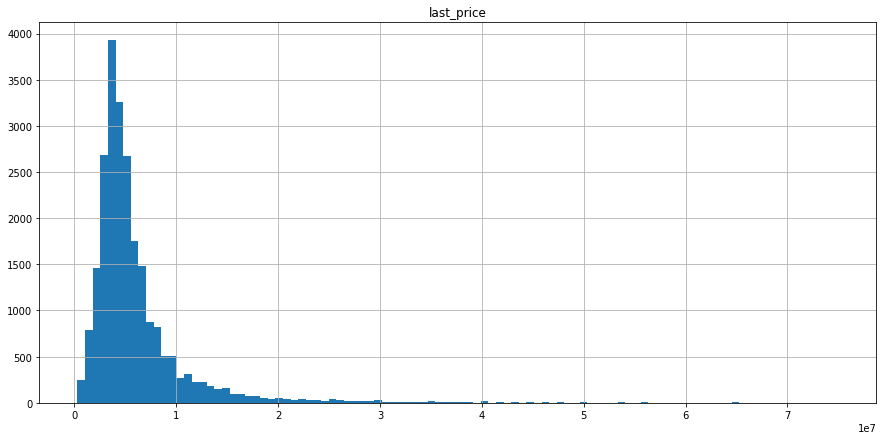

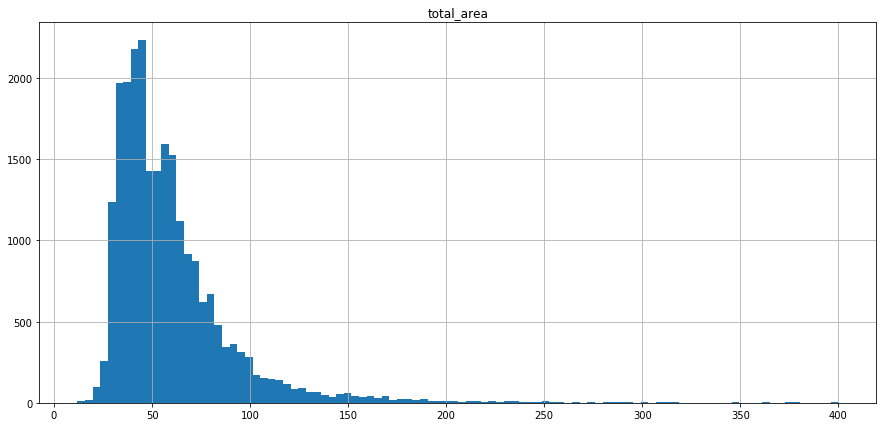

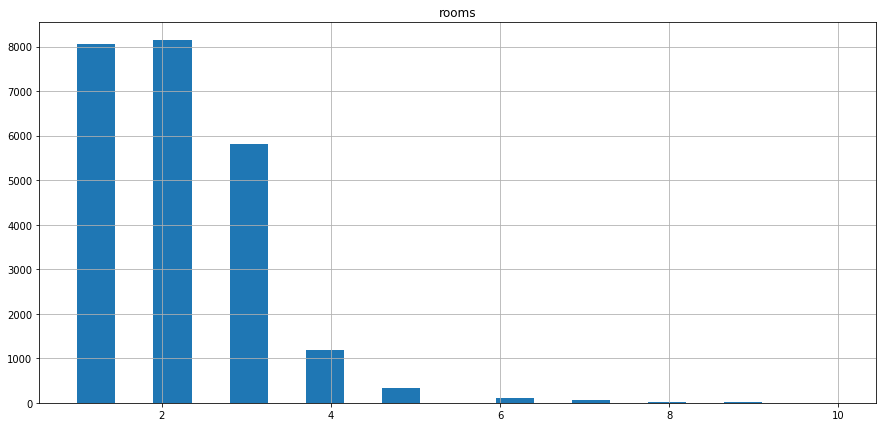

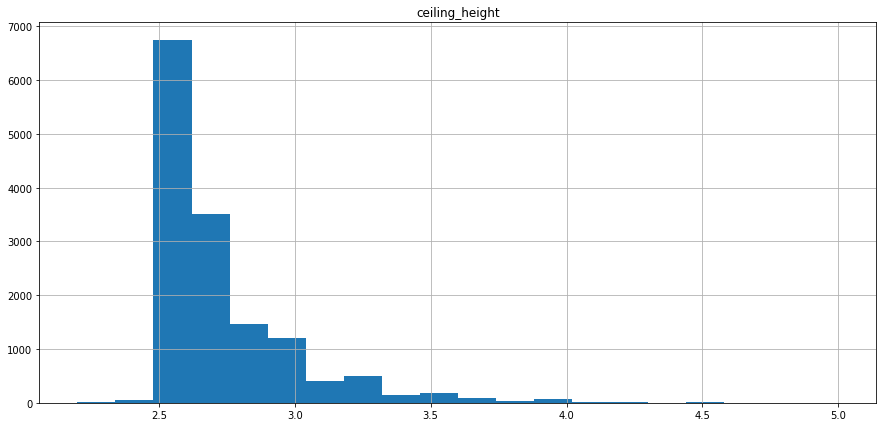

In [97]:
factors = ['last_price', 'total_area', 'rooms', 'ceiling_height']
rang = [(300000, 75000000), (12, 400), (1, 10), (2.2, 5)]
bins = [100, 100, 20, 20]
for f, r, b in zip(factors, rang, bins):
    real_estate.hist(f, bins = b, range = r, figsize = (15, 7))
    plt.show()

Распределение **стоимости квартиры** похоже на логарифмически нормальное. 

Для дальнейшего исследования оставим квартиры стоимостью до 75 млн: значений, находящихся в интервале от 75 до 770 млн крайне мало (67), и их можно рассматривать как выбросы:

In [98]:
real_estate.query('last_price > 75000000')['last_price'].count()

67

Подавляющее число квартир стоит от 700 000 до 10 000 000 р.

Распределение **площади квартиры** ведет себя похоже на распределение **стоимости квартиры**. Это позволяет предположить наличие взаимосвязи. 

Будем рассматривать как выбросы значения площади, превышающие 400 кв. м:

In [99]:
real_estate.query('total_area > 400').shape[0]

23

Основная доля квартир по площади составляет от 25 до 100 кв. м.

По гистограмме **количества комнат** можно сказать, что в квартирах преимущественно от 1 до 3 комнат. Выбросами будем считать количество комнат, превышающее 10:

In [100]:
real_estate.query('rooms > 10').shape[0]

8

Судя по гистограмме **высоты потолков**, в основном она колеблется от 2,5 до 3 м. Количество выбросов незначительно:

In [101]:
real_estate.query('ceiling_height > 5').shape[0]

11

Таким образом, можно рассматривать далее значения указанных переменных на следующих промежутках:

- **last_price** - от 300 000 до 75 000 000 р.
- **total_area** - от 12 до 400 кв. м.
- **rooms** - от 1 до 10 
- **ceiling_height** - от 2,2 до 5 м 

Чтобы сделать окончательные выводы, построим матрицу рассеяния для нового датафрейма без выбросов и рассчитаем коэффициент корреляции:

In [102]:
real_est_cut = real_estate.query('300000 <= last_price <= 75000000 and\
                                12 <= total_area <= 400 and\
                                1 <= rooms <= 10 and \
                                (2.2 <= ceiling_height <= 5 or ceiling_height.isna())')

In [103]:
real_est_cut.shape

(23607, 29)

Новый датафрейм после удаления выбросов меньше исходного всего лишь на 97 строк. Дальнейшая работа с ним не исказит результаты. 

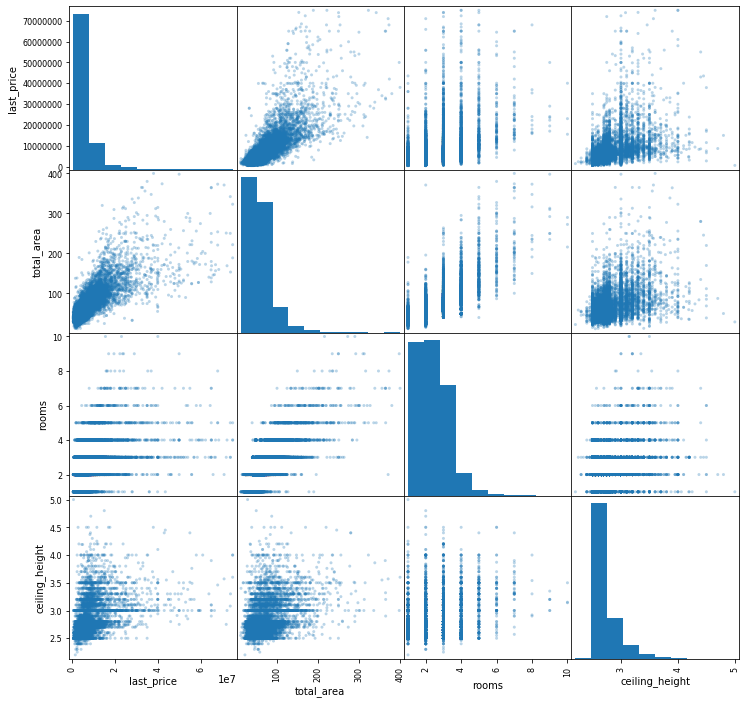

In [104]:
pd.plotting.scatter_matrix(real_est_cut[['last_price', 'total_area', 'rooms', 'ceiling_height']],\
                           alpha = 0.3, figsize = (12, 12))
plt.show()

In [105]:
real_est_cut[['last_price', 'total_area', 'rooms', 'ceiling_height']].corr()

,last_price,total_area,rooms,ceiling_height
last_price,1.000000,0.774116,0.483519,0.492895
total_area,0.774116,1.000000,0.781927,0.483892
rooms,0.483519,0.781927,1.000000,0.289328
ceiling_height,0.492895,0.483892,0.289328,1.000000


**Вывод**

С помощью гистограмм удалось определить наиболее характерные значения каждого из факторов, а также отсеять выбросы. Стоимость квартир составляет в основном 700 000 - 10 000 000 р, площадь - от 25 до 100 кв. м. Как правило, в квартирах от 1 до 3 комнат, а высота потолков в квартирах принимает значения от 2,5 до 3 м.

Матрица рассеивания позволяет сделать следующее заключение: единственная высокая положительная корреляция (0,77) наблюдается между стоимостью квартиры и ее общей площадью, причем в основном на значениях площади до 130 кв.м. и стоимости квартир до 20 млн р. Связь (также положительная) стоимости с количеством комнат (0,48) и высотой потолков (0,49) можно оценить как среднюю. Они тоже сильнее при низких ценах на квартиры (до 20 млн р.)



**Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?** <a name="time_analysis"></a>

Построим гистограмму и диаграмму размаха переменной **days_exposition**:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f407b54c950>]],
      dtype=object)

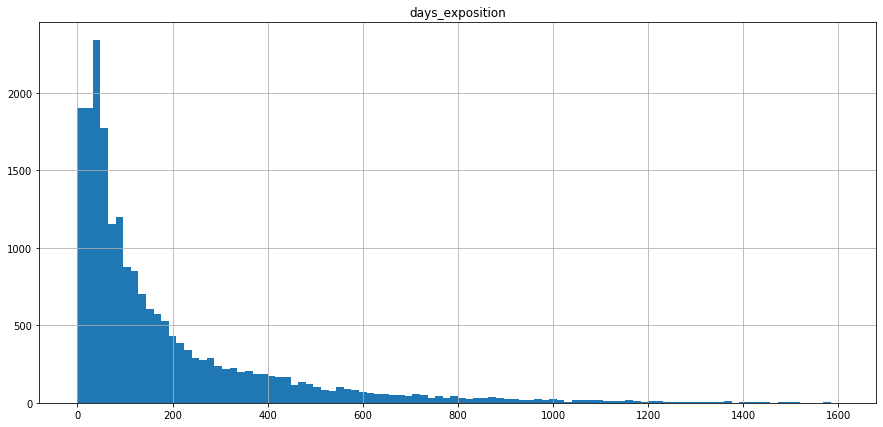

In [106]:
real_estate.hist('days_exposition', bins = 100, range = (0, 1600), figsize = (15, 7))

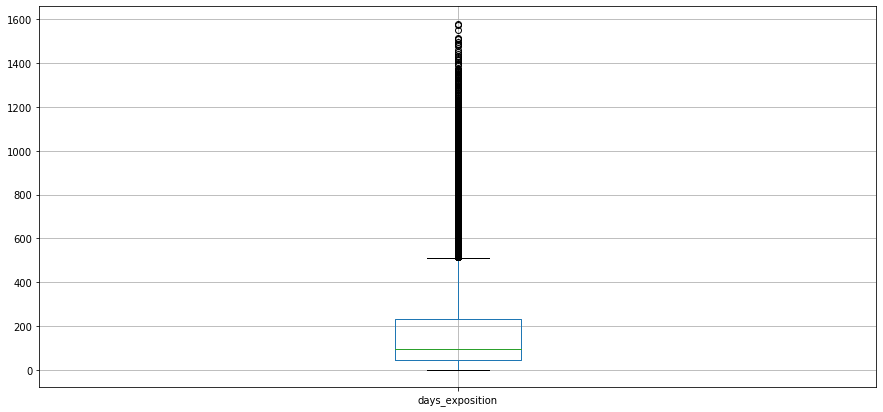

In [107]:
real_estate.boxplot(column = 'days_exposition', figsize = (15, 7))

In [108]:
real_estate['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

**Вывод**

Интерпретируя диаграмму размаха, можно было бы сделать вывод, что статистически значимые значения лежат в промежутке от минимального значения (1) до примерно 520. Однако это скорее всего лишь указывает на отличный от нормального харакетр распределения переменной. 

Медиана выборки равна 95, среднее значение - 180 (столь сильное расхождение обусловлено большим значением выбросов, поэтому в качестве среднего взначения по выборке предпочтительнее взять медиану). Тогда в среднем продажа квартиры занимает 95 дней. Будем считать, что продажа прошла очень быстро, если показатель не превысил значение первого квартиля, т.е. составил менее 45 дней, а необычно долго - если принял значение, равное третьему квартилю или большее, т.е. от 232 дней.

**Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.** <a name="ejections"></a>

В предыдущих пунктах уже были убраны строки с редкими значениями для переменных **last_price, total_area, rooms, ceiling_height**. Среди столбцов, по которым далее нужно будет провести аналитику, на выбросы следует проверить **cityCenters_nearest**. 

Исходя из логики построения столбцов, описывающих категориальные данные (**publ_weekday, publ_month, floor_categ**), выбросов в них не должно быть. Следует проверить только переменную **publ_year** на случай, если в ней окажутся очень старые объявления или по ошибке год, который еще не наступил. 

**cityCenters_nearest - расстояние до центра города**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f407b56b590>]],
      dtype=object)

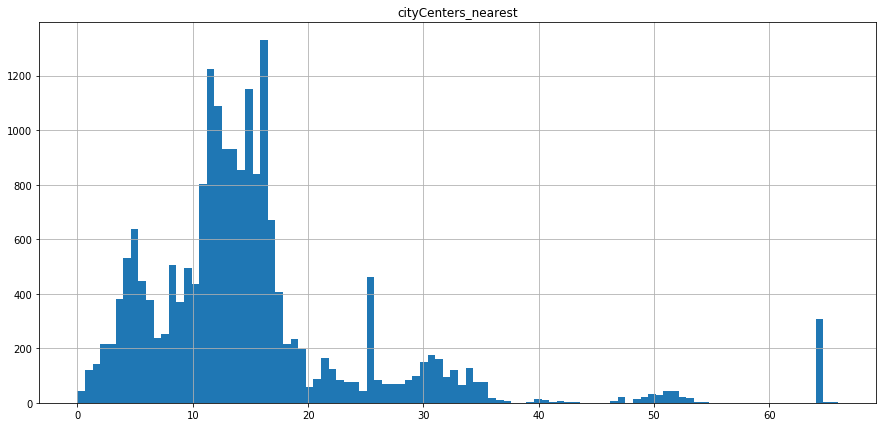

In [109]:
real_est_cut.hist('cityCenters_nearest', bins = 100, range = (0, 66), figsize = (15, 7))

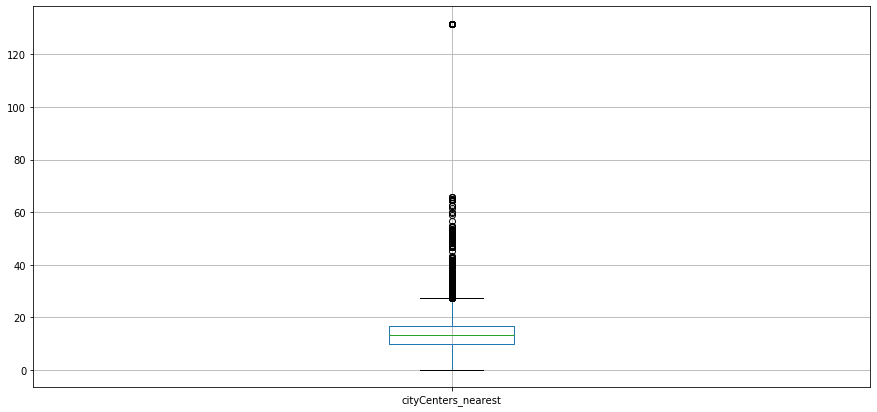

In [110]:
real_estate.boxplot(column = 'cityCenters_nearest', figsize = (15, 7))

Несмотря на то, что boxplot считает значения, превышающие 27-28 км, выбросами, отрезав "хвост", потеряем слишком большое количество строк. Так, убрав значения, превышающие 50, получим:

In [111]:
real_est_cut.query('cityCenters_nearest <= 60 or ceiling_height.isna()').shape[0]

21266

Это 89,7% исходных значений. Не будем терять 10% строк с информацией, тем более в левой части гистограммы имеется довольно высокий пик, которому существует объяснение (квартиры в одном из наиболее удаленных пригородов Петербурга). 

**publ_year — год публикации объявления**

In [112]:
real_est_cut['publ_year'].describe()

count    23607.000000
mean      2017.368662
std          1.038742
min       2014.000000
25%       2017.000000
50%       2017.000000
75%       2018.000000
max       2019.000000
Name: publ_year, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f407c0d62d0>]],
      dtype=object)

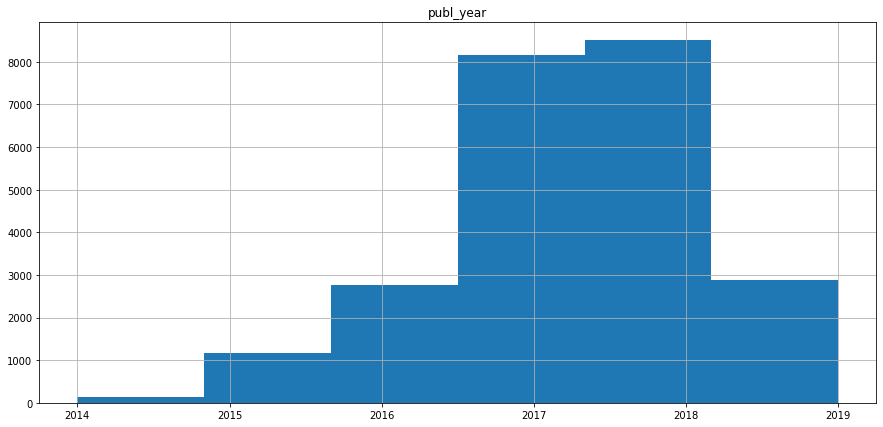

In [113]:
real_est_cut.hist('publ_year', bins = 6, range = (2014, 2019), figsize = (15, 7))

Аномальных значений в распределении нет.

**Вывод**

Из столбцов, отвечающих за количественные переменные (**last_price, total_area, rooms, ceiling_height**), убраны выбросы, которые представляют собой единичные значения в левых концах диаграмм (характеристики необычных квартир - с огромным количеством комнат, очень высокими потолками, необычайно большие по площади). Общее количество строк в датафрейме при этом сократилось незначительно. 

В столбце **cityCenters_nearest** было принято решение оставить все данные, чтобы не потерять относительно большой объем данных (более 10% строк), а также не пропустить пик в левом конце гистограммы (квартиры в одном из удаленных пригородов Петербурга).

В столбцах, отвечающих за категориальные переменные (**publ_weekday, publ_month, publ_year, floor_categ**) выбросов и аномальных значений нет.

**Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.** <a name="price_factors"></a>

Построим диаграммы рассеяния для количественных переменных (**last_price - total_area**, **last_price - rooms**, **last_price - cityCenters_nearest**):

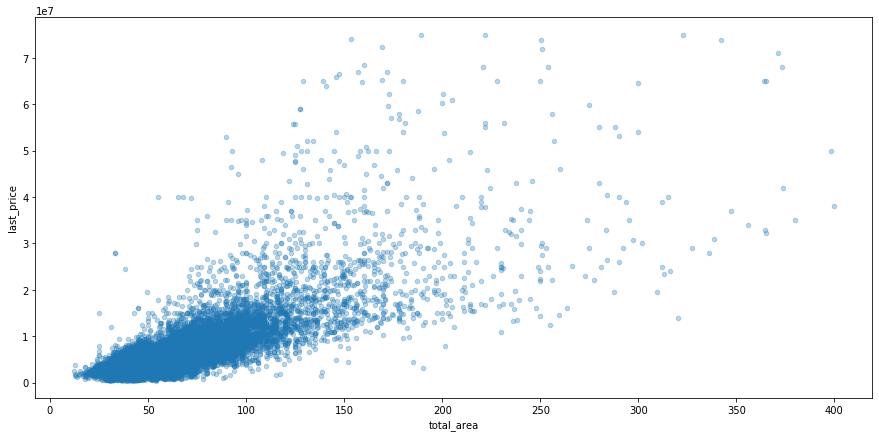

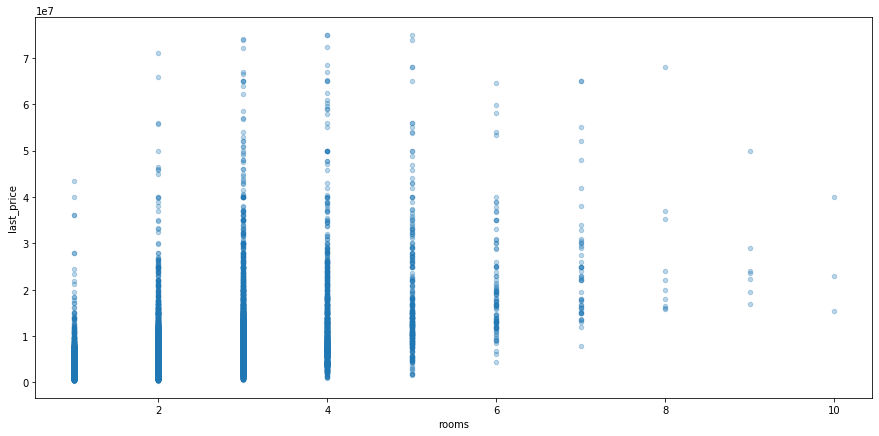

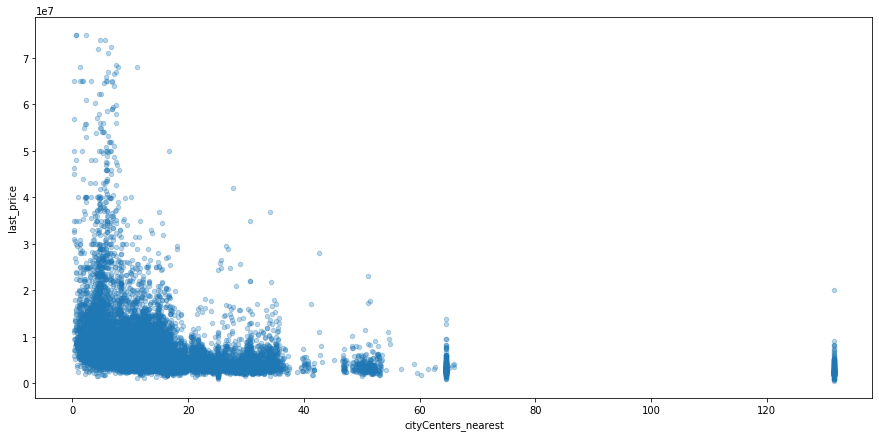

In [114]:
factors = ['total_area', 'rooms', 'cityCenters_nearest']
for f in factors:
    real_est_cut.plot(x = f, y = 'last_price', kind = 'scatter', alpha = 0.3, figsize = (15, 7))
    plt.show()

Между стоимостью квартиры и ее общей площадью наблюдается относительно высокая положительная взаимосвязь, причем в основном на значениях площади до 130 кв.м. и стоимости квартир до 20 млн р.

Между стоимостью квартиры и числом комнат связь средняя положительная (в первом пункте указанного раздела был рассчтан коэффициент корреляции - 0,48), по большей части имеет место между менее дорогими квартирами и числом комнат до 4-х. 

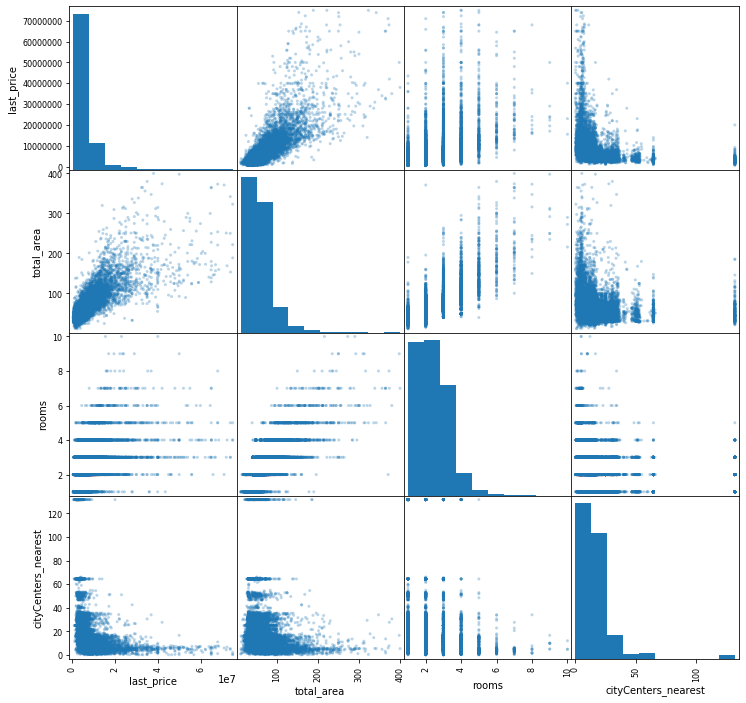

In [115]:
pd.plotting.scatter_matrix(real_est_cut[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']],\
                           alpha = 0.3, figsize = (12, 12))
plt.show()

In [116]:
real_est_cut[['cityCenters_nearest', 'last_price']].corr()

,cityCenters_nearest,last_price
cityCenters_nearest,1.00000,-0.23957
last_price,-0.23957,1.00000


Связь между стоимостью квартиры и расстоянием до центра можно охарактеризовать как слабую отрицательную (коэффициент корреляции -0,24): чем больше расстояние от центра, тем ниже цена. Однако зависимость несильная.

Построим диаграммы размаха для **last_price** по всем возможным категориям переменной **floor_categ**:

In [117]:
real_est_cut['floor_categ'].value_counts()

другой       17386
последний     3309
первый        2912
Name: floor_categ, dtype: int64

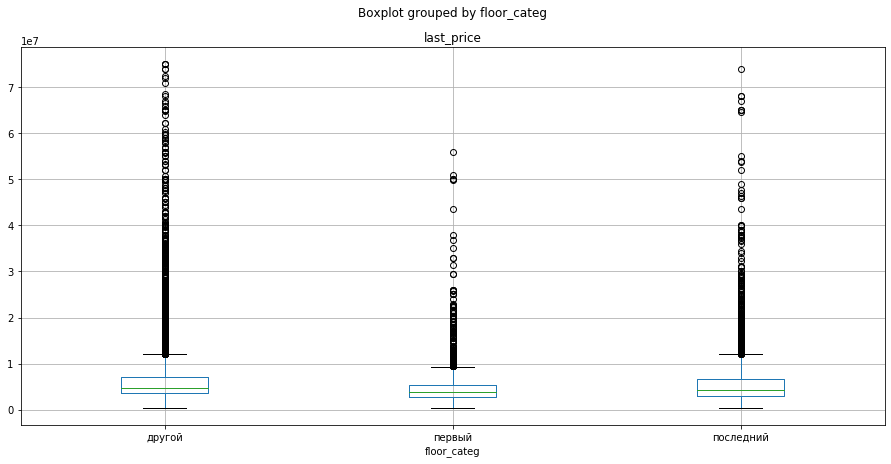

In [118]:
real_est_cut.boxplot(column = 'last_price', by='floor_categ', figsize = (15, 7))

(0, 15000000)

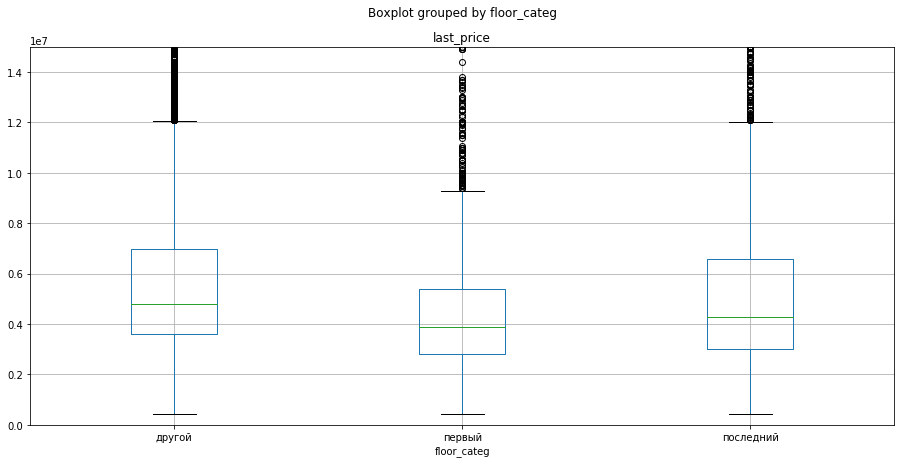

In [119]:
real_est_cut.boxplot(column = 'last_price', by='floor_categ', figsize = (15, 7))
plt.ylim(0, 15000000)

Медианное значение стоимости квартир (3,9 млн р.) на первом этаже уступает аналогичным показателям для всех других этажей (4,2 млн для последнего, 4,9 млн - для остальных). Межквартильный размах квартир на первом этаже более узкий и принимает более низкие значения (примерно от 2,9 до 5,5 млн р.), в то время как для квартир на последнем этаже - от 3 до 6,7 млн, на других этажах - от 3,7 до 7 млн р. Медиана и межквартильный размах квартир на последнем этаже практически не отличаются от аналогичных показателей квартир на других этажах.

Таким образом, можно сделать вывод о том, что квартиры на первом этаже в целом уступают по стоимости квартирам на любом другом этаже.

Построим диаграммы размаха для **last_price** по всем возможным категориям переменной **publ_weekday**:

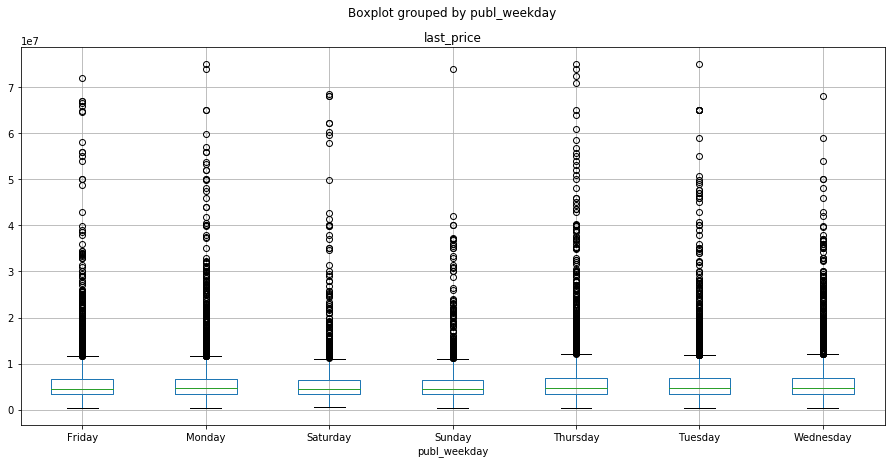

In [120]:
real_est_cut.boxplot(column = 'last_price', by='publ_weekday', figsize = (15, 7))

Построим этот же график без выбросов, чтобы оценить медианные значения и межквартильный размах:

(0, 15000000)

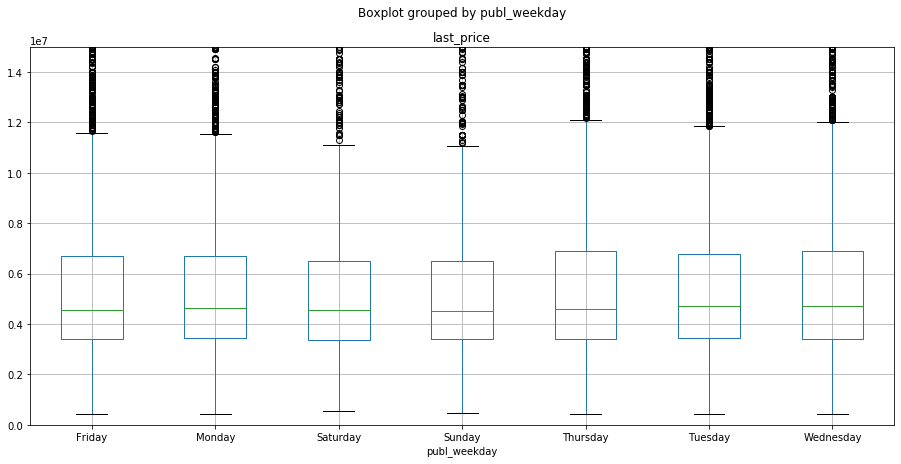

In [121]:
real_est_cut.boxplot(column = 'last_price', by='publ_weekday', figsize = (15, 7))
plt.ylim(0, 15000000)

Медианные значения и межквартильный размах цен на квартиру практически не зависят от дня публикации сообщения. Однако по первому графику видно, что объявления о самых дорогих квартирах не публикуются по воскресеньям (всего два объявления с ценой более 40 млн р.) и реже по субботам. Чаше всего объявления о дорогих квартирах размещаются по четвергам.

Построим диаграммы размаха для **last_price** по всем возможным категориям переменной **publ_month**:

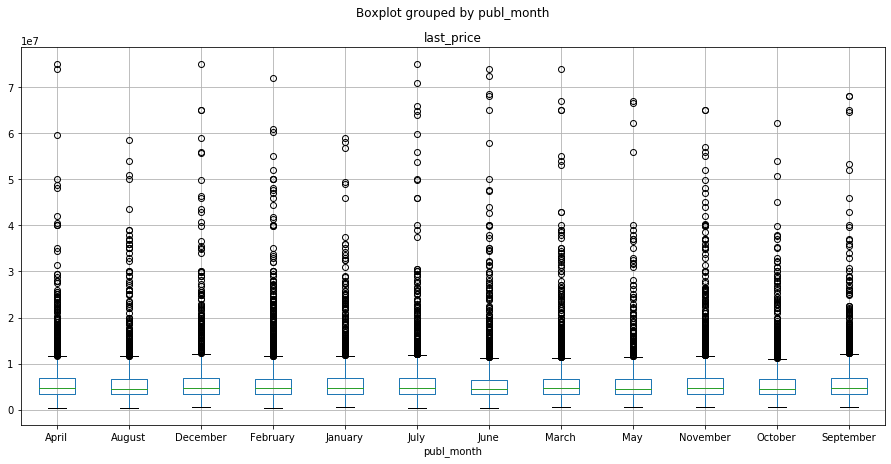

In [122]:
real_est_cut.boxplot(column = 'last_price', by='publ_month', figsize = (15, 7))                                                                      

Зависимости медианного значения и межквартильного размаха от месяца публикации объявления не наблюдается. Все значения лежат в примерно одинаковом диапазоне. Что касается продажи дорогих квартир, то объявлений наблюдается меньше в январе, мае и августе. Возможное объяснение этому - периоды каникул и отпусков.

Построим диаграммы размаха для **last_price** по всем возможным категориям переменной **publ_year**:

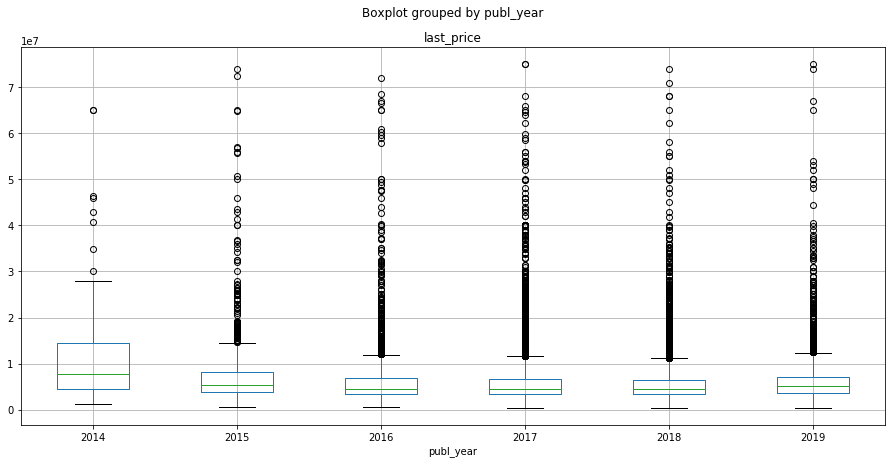

In [123]:
real_est_cut.boxplot(column = 'last_price', by='publ_year', figsize = (15, 7))   

(0, 15000000)

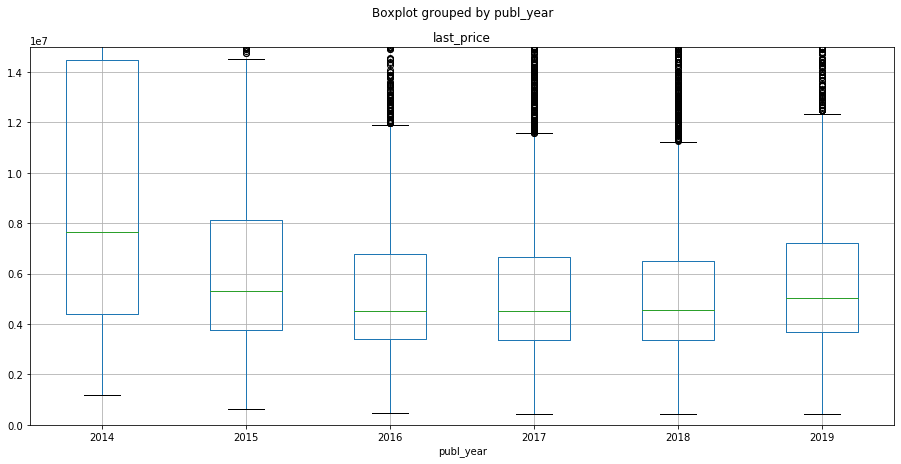

In [124]:
real_est_cut.boxplot(column = 'last_price', by='publ_year', figsize = (15, 7))
plt.ylim(0, 15000000)

In [125]:
real_est_cut['publ_year'].value_counts()

2018    8499
2017    8154
2019    2869
2016    2772
2015    1177
2014     136
Name: publ_year, dtype: int64

График с объявлениями за 2014 г. имеет другой вид (существенно больше межквартильный размах, выше медиана), поскольку количество объявлений было в десятки раз ниже, чем в последующие годы (сервис Яндекс.Недвижимость стал самостоятельно размещать объявления, начиная с конца 2014 г.). По мере роста количества публикаций графики все более и более походят друг на друга. Можно отметить, что в 2019 г. произошло увеличение медианного значения, а вот количество дорогих квартир, выставленных на продажу, сократилось (вероятно, влияние экономического кризиса).

**Вывод**

На стоимость квартиры из рассмотренных факторов в первую очередь влияет ее площадь (коэффициент корреляции 0,78). По большей части взаимосвязь прослеживается между относительно недорогими квартирами (до 20 млн р.) площадью до 130 кв.м.

Также цена квартиры довольно сильно зависит от того, на первом ли этаже она находится. Относительно недорогое жилье на первых этажах будет стоить меньше, чем на других. Для квартир на последних этажах аналогичной зависимости не выявлено.

Имеет место положительная средняя взаимосвязь (коэффициент корреляции 0,48) между недорогими квартирами и количеством комнат до 4-х. Как и в случае с площадью, для многокомнатных квартир зависимость уже не прослеживается так четко.

Связь между стоимостью квартиры и расстоянием до центра можно охарактеризовать как несильную и отрицательную (коэффициент корреляции -0,24): чем больше расстояние от центра, тем ниже цена. 

Стоимость основного объема жилья (до 12 млн р.) практически не коррелирует ни с днем, ни с месяцем, ни с годом публикации сообщения. При этом объявления о продаже дорогостоящих квартир реже публикуются, когда люди отдыхают: по выходным (особенно воскресеньям), а также в январе, мае и августе.

С того момента, как сервис Яндекс.Недвижимость стал публиковать достаточно большое количество объявлений о продаже квартир (2016 г.), их медианная стоимость год год от года оставалась примерно на одном и том же уровне (около 5 млн р.). Лишь в 2019 г. наблюдался ее прирост (примерно 0,3 млн р.), а количество дорогих квартир, выставленных на продажу, напротив, сократилось (вероятно, под влиянием экономического кризиса).

**Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья.** <a name="max_min_price"></a>

Построим сводную таблицу. Для ответа на первый вопрос достаточно просуммировать количество имеющихся объявлений (например, используя параметр цены, так как он встречался в каждом объявлении) в каждом населенном пункте.

In [126]:
pivot_locality_max = real_est_cut.pivot_table(index = 'locality_name', values = 'last_price', aggfunc = 'count')\
                                    .reset_index().sort_values(by = 'last_price', ascending = False)

In [127]:
pivot_locality_max.columns = ['locality_name', 'num_ads']

In [128]:
locality_max = pivot_locality_max.head(10)

Вот искомые населенные пункты:

In [129]:
locality_max

,locality_name,num_ads
33,Санкт-Петербург,15680
291,посёлок Мурино,522
326,посёлок Шушары,440
3,Всеволожск,398
32,Пушкин,369
13,Колпино,338
296,посёлок Парголово,327
6,Гатчина,307
93,деревня Кудрово,299
4,Выборг,237


Посчитаем среднюю цену для каждого из указанных населенных пунктов:

In [130]:
pivot_locality_avg_price = real_est_cut.pivot_table(index = 'locality_name', values = 'price_for_sq_meter', aggfunc = 'mean')\
                                    .reset_index().query('locality_name in @locality_max.locality_name')\
                                    .sort_values(by = 'price_for_sq_meter', ascending = False)

In [131]:
pivot_locality_avg_price

,locality_name,price_for_sq_meter
33,Санкт-Петербург,113023.995581
32,Пушкин,103125.819291
93,деревня Кудрово,92473.547576
296,посёлок Парголово,90175.913458
291,посёлок Мурино,85752.189195
326,посёлок Шушары,78677.364217
13,Колпино,75424.579098
6,Гатчина,68746.146763
3,Всеволожск,68654.473986
4,Выборг,58141.909153


**Вывод**

Количество объявлений о продаже квартир больше всех в следующих населенных пунктах: Санкт-Петербург, Мурино, Шушары, Всеволожск, Пушкин, Колпино, Парголово, Гатчина, Кудрово, Выборг. Среди них по средней цене за 1 кв. метр жилья лидирует Санкт-Петербург (113 023 р.), замыкает десятку Выборг (58 142 р.).

**Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге. Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.** <a name="center_zone"></a>

Создадим новый датафрейм, в котором будет содержаться информация только о квартирах в Санкт-Петербурге:

In [132]:
real_est_spb = real_est_cut.query('locality_name == "Санкт-Петербург"')

In [133]:
real_est_spb.shape

(15680, 29)

Ранее мы уже переводили расстояние до центра в километры. 

Проверим, сколько пропусков в столбце:

In [134]:
real_est_spb['cityCenters_nearest'].isna().sum()

68

Для выборки по Санкт-Петербургу пропущего всего 68 значений из 15680 (0,4%). Для удобства работы заменим их на среднее (в силу незначительного количества на итоговом результате это не отразится):

In [135]:
real_est_spb.loc[real_est_spb['cityCenters_nearest'].isna(), 'cityCenters_nearest'] \
                                                    = real_est_spb['cityCenters_nearest'].mean()

In [136]:
real_est_spb['cityCenters_nearest'].isna().sum()

0

Округлим:

In [137]:
real_est_spb['cityCenters_nearest'] = real_est_spb['cityCenters_nearest'].round(0)

In [138]:
real_est_spb['cityCenters_nearest'].describe()

count    15680.000000
mean        11.636161
std          4.847054
min          0.000000
25%          8.000000
50%         12.000000
75%         15.000000
max         41.000000
Name: cityCenters_nearest, dtype: float64

Посчитаем среднюю цену за 1 кв.м. жилья для каждого километра: 

In [139]:
pivot_avg_price_km = real_est_spb.pivot_table(index = 'cityCenters_nearest', values = 'price_for_sq_meter', aggfunc = 'mean')\
                                    .reset_index().sort_values(by = 'cityCenters_nearest', ascending = True)

In [140]:
pivot_avg_price_km.columns = ['km', 'price_for_sq_meter']

In [141]:
pivot_avg_price_km.head(10) 

,km,price_for_sq_meter
0,0.0,223446.081658
1,1.0,149233.021297
2,2.0,142902.619523
3,3.0,118837.646663
4,4.0,128385.193103
5,5.0,136329.399049
6,6.0,143821.206103
7,7.0,151305.198598
8,8.0,125042.973423
9,9.0,113234.152339


Построим график зависимости стоимости 1 кв. м. жилья от удаленности от центра:

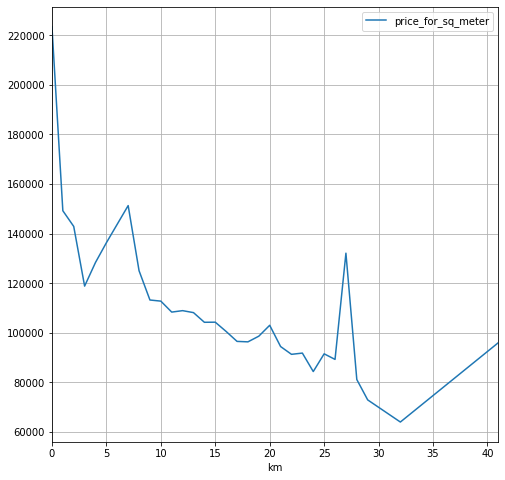

In [142]:
pivot_avg_price_km.plot(x = 'km', y = 'price_for_sq_meter', xlim = (0, 41), grid = True, figsize = (8,8))

В целом прослеживается тенденция к снижению цены при росте удаленности от центра города. Однако на графике есть несколько пиков, не укладывающихся в ожидаемую картину (подозрительно высокие значения на 7-м, 27-м километрах, а также рост на 32-40 км). Попробуем разобраться, чем они вызваны.

Что касается квартир, расположенных в 27 км от центра, в выборку попало всего два значения из 15 680, одно из них аномально высокое (даже в удаленных от центра районах могут находиться относительно дорогие квартиры):

In [143]:
real_est_spb.query('cityCenters_nearest == 27')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_for_sq_meter,publ_weekday,publ_month,publ_year,floor_categ,living_to_total,kitchen_to_total
748,13,14350000.0,74.0,2017-11-28,2,3.13,5,30.0,3,True,...,0.0,NaN,128.0,193918.918919,Tuesday,November,2017,другой,0.405405,0.337838
5961,6,2250000.0,32.0,2018-02-27,1,NaN,2,16.5,2,True,...,0.0,NaN,178.0,70312.500000,Tuesday,February,2018,последний,0.515625,0.218750


Удалим его:

In [144]:
del_ = real_est_spb[(real_est_spb['cityCenters_nearest'] == 27) & (real_est_spb['price_for_sq_meter'] > 100000)]

In [145]:
real_est_spb = real_est_spb.drop(del_.index, axis=0)

Теперь посмотрим на правый "хвост" графика:

In [146]:
real_est_spb.query('27 <= cityCenters_nearest <= 41')['cityCenters_nearest'].value_counts()

28.0    7
29.0    6
32.0    2
41.0    1
27.0    1
Name: cityCenters_nearest, dtype: int64

Значений крайне мало, на промежутке с 33 по 40 км они вообще отсутствуют. Более правильным будет ограничить значения удаленности 29 километрами. Отразим это на итоговом графике.

Наконец, рассмотрим пики графика в левой части (неожиданный рост стоимости жилья для квартир, удаленных от центра на 4-7 км). 

In [147]:
real_est_spb.query('0 <= cityCenters_nearest <= 8')['cityCenters_nearest'].value_counts()

5.0    907
4.0    687
6.0    603
8.0    597
7.0    412
3.0    348
2.0    298
1.0    180
0.0     25
Name: cityCenters_nearest, dtype: int64

Количество наблюдений слишком большое для предположения о том, что всего несколько аномальных значений исказят картину. Одним из возможных объяснений пика может быть то, что как раз на расстоянии 3,5 - 6 км от центра города располагается Крестовский остров, на котором сосредоточено практически все элитное жилье Санкт-Петербурга. 

Изобразим итоговый график:

In [148]:
pivot_avg_price_km = real_est_spb.pivot_table(index = 'cityCenters_nearest', values = 'price_for_sq_meter', aggfunc = 'mean')\
                                    .reset_index().sort_values(by = 'cityCenters_nearest', ascending = True)

In [149]:
pivot_avg_price_km.columns = ['km', 'price_for_sq_meter']

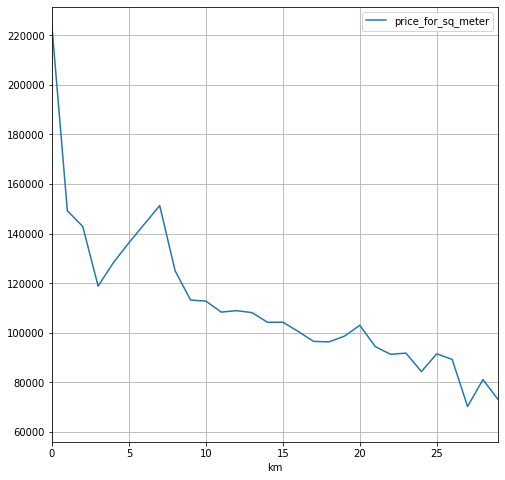

In [150]:
pivot_avg_price_km.plot(x = 'km', y = 'price_for_sq_meter', xlim = (0, 29), grid = True, figsize = (8,8))

Резкий излом графика происходит на 7 км. Именно зону 0-7 км будем считать центральной.

**Вывод**

Построен график зависимости стоимости 1 кв. метра жилья от расстояния до центара Санкт-Петербурга. График ведет себя неожиданно в левой части (стоимость жилья растет при увеличении удаленности с 3 до 7 км), однако это может объясняться тем, что как раз на указанном расстоянии находится средоточие элитного жилья Санкт-Петербурга. Будем считать границей центральной зоны дистанцию 7 км - именно после этой точки начинается довольно резкое падение цены.

**Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?** <a name="center_analysis"></a>

Выделим квартиры, находящиеся в пределах 7 км от центра, в отдельный датафрейм. В нем 3460 строк:

In [151]:
real_est_center = real_est_spb.query('cityCenters_nearest <= 7')

In [152]:
real_est_center.shape

(3460, 29)

Сначала построим отдельные гистограммы для каждого из параметров: **площадь, цена, число комнат, высота потолков**:

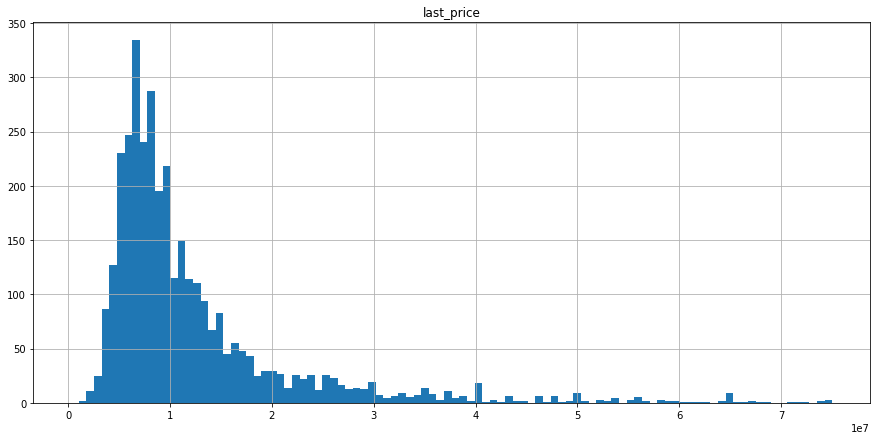

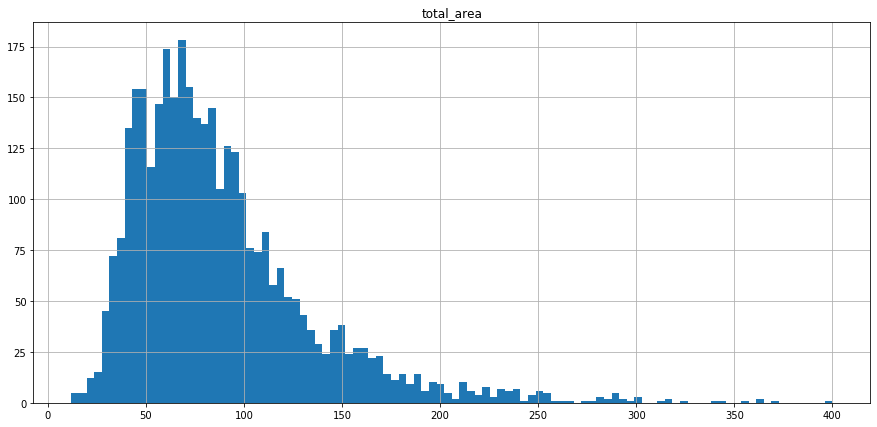

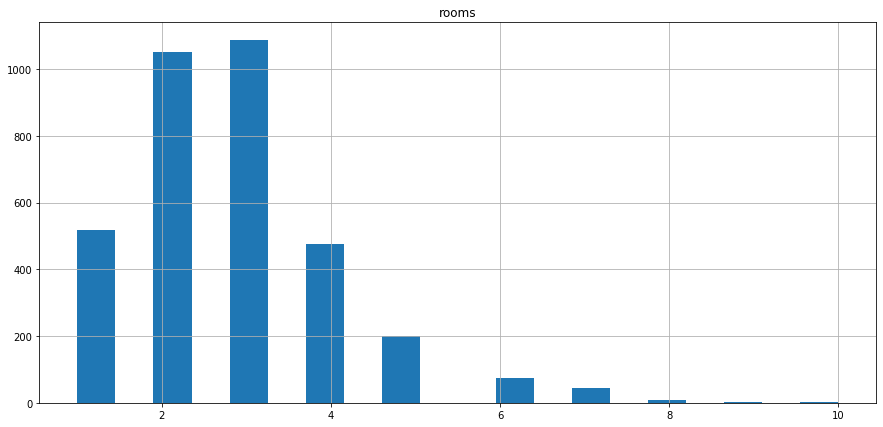

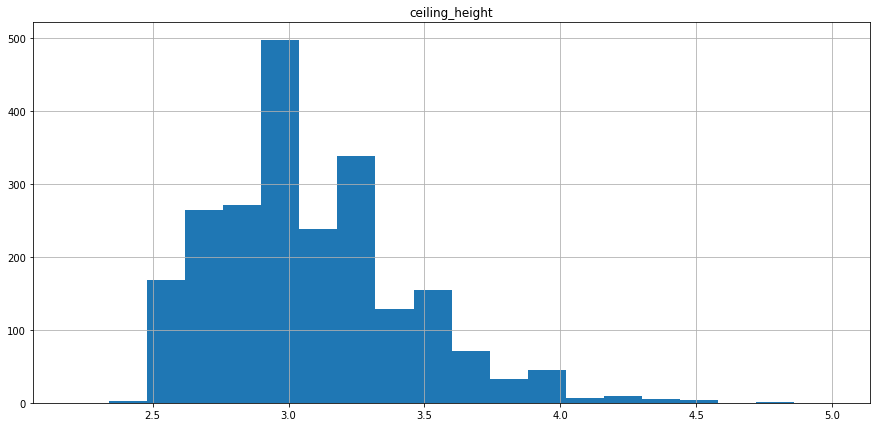

In [153]:
factors = ['last_price', 'total_area', 'rooms', 'ceiling_height']
rang = [(300000, 75000000), (12, 400), (1, 10), (2.2, 5)]
bins = [100, 100, 20, 20]
for f, r, b in zip(factors, rang, bins):
    real_est_center.hist(f, bins = b, range = r, figsize = (15, 7))
    plt.show()

Большая часть значений цены сосредоточена в левой части графика (относительно низкие цены - от 5 до 20 млн р.) и длинный узкий "хвост" из дорогих квартир. Похоже выглядит и гистограмма площади: основная часть значений в левой части графика (квартиры площадью до 200 млн р.). 

Из третьей гисторгаммы можно заключить, что в центре продаются преимущественно квартиры с 1-4 комнатами, а из последней - что максимальное количество квартир имеет потолки высотой 3 метра.

Наложим друг на друга гистограммы по всей выборке и для центральной зоны:

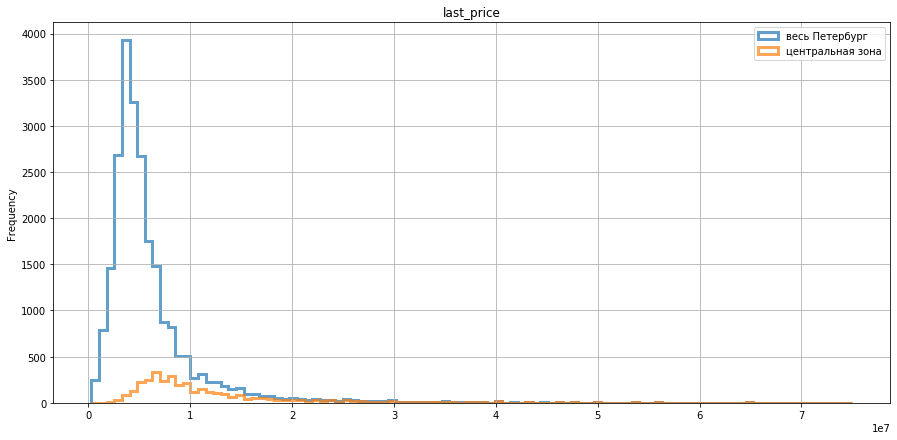

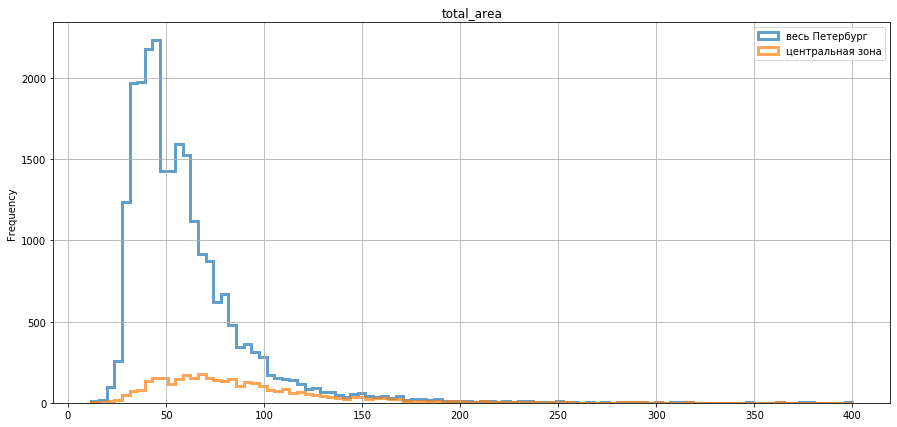

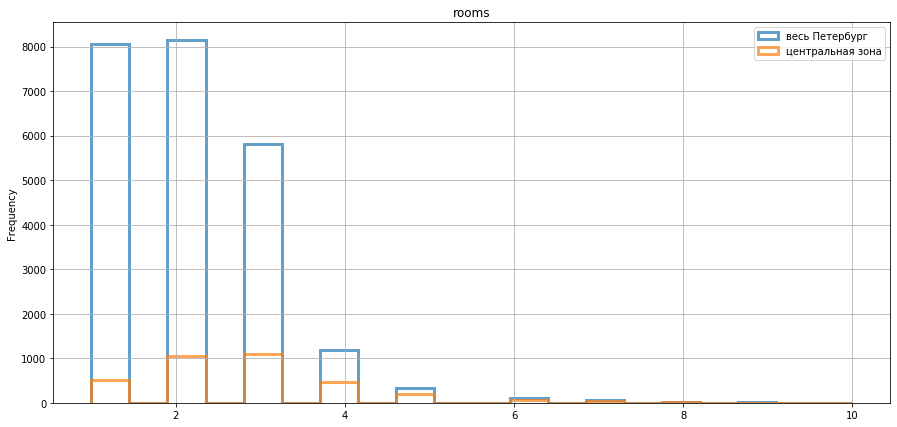

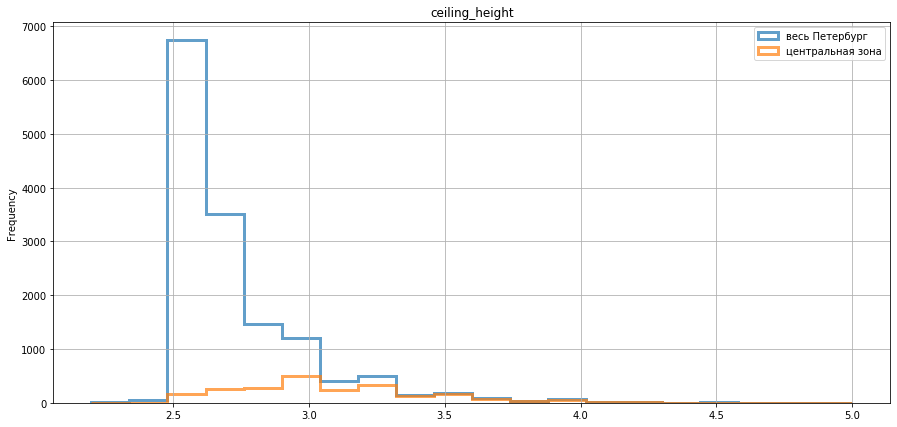

In [154]:
factors = ['last_price', 'total_area', 'rooms', 'ceiling_height']
rang = [(300000, 75000000), (12, 400), (1, 10), (2.2, 5)]
bins = [100, 100, 20, 20]

for f, r, b in zip(factors, rang, bins):
    ax = real_estate.plot(kind = 'hist', y = f, histtype = 'step', \
                              range = r, bins = b, linewidth = 3, alpha = 0.7, label = 'весь Петербург')
    real_est_center.plot(kind = 'hist', y = f, histtype = 'step', \
                              range = r, bins = b, linewidth = 3, alpha = 0.7, label = 'центральная зона',\
                                ax = ax, grid = True, legend = True, title = f, figsize = (15, 7))
    plt.show()



Распределения цены по обеим выборкам ведут себя в целом одинаково. Гистограмма для центральной зоны существенно менее высокая (т.к. объем выборки в 7 раз меньше), а ее мода находится правее моды выборки всего датафрейма (7 млн против 3 млн), т.е. в среднем цена на квартиру в центральной зоне выше. 

Распределения площади квартиры тоже ведут себя похоже. Гистограмма для центральной зоны существенно менее высокая (обусловлено разным количеством значений в выборках) и при этом более пологая (значения площади распределены более равномерно).

В центре, как и по всей выборке в целом, продаются преимущественно квартиры с 1-4 комнатами. Однако если для всего Петербурга характерны больше одно- и двухкомнатные квартиры, то для центральной зоны - двух- и трех. При этом четырехкомнатных квартир столько же, сколько и однокомнатных (по выборке в целом четырехкомнатных квартир существенно меньше в относительном количестве).

Максимальное количество квартир в центре имеет потолки высотой 3 метра, в отличиии от выборки по всему городу, где этот показатель составляет 2,5 метра. Количество квартир с потолками выше трех метров практически совпадает по обеим выборкам, при том что выборка по центру существенно меньше по объему. Таким образом, доля квартир с высокими потолками в центре значительно выше, чем по городу в целом. Можно сказать, что именно квартиры, расположенные в центральной зоне, и составляют весь объем жилья с потолками от 3 м. 

---

Далее рассмотрим, как поведение цены квартиры в центральной зоне меняется в зависимости от **площади квартиры, числа комнат, высоты потолков, этажа, удалённости от центра, даты размещения объявления**.

Построим матрицу рассеяния и посчитаем коэффициент корреляции для всех количественных переменных:

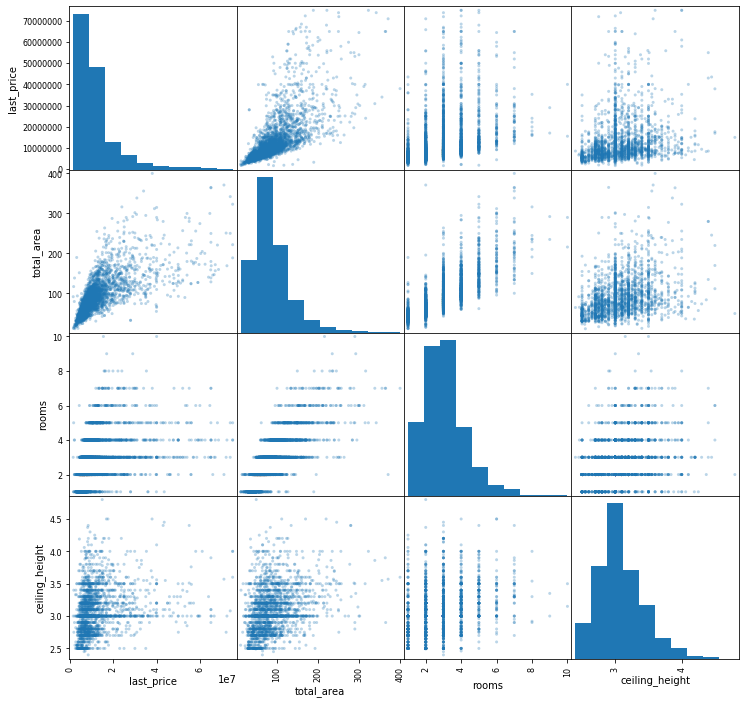

In [155]:
pd.plotting.scatter_matrix(real_est_center[['last_price', 'total_area', 'rooms', 'ceiling_height']],\
                           alpha = 0.3, figsize = (12, 12))
plt.show()

In [156]:
real_est_center[['last_price', 'total_area', 'rooms', 'ceiling_height']].corr()

,last_price,total_area,rooms,ceiling_height
last_price,1.000000,0.708348,0.406801,0.234379
total_area,0.708348,1.000000,0.780771,0.339287
rooms,0.406801,0.780771,1.000000,0.289881
ceiling_height,0.234379,0.339287,0.289881,1.000000


Между стоимостью квартиры и ее общей площадью наблюдается относительно высокая положительная взаимосвязь (коэффициент корреляции 0,70), причем в основном на значениях площади до 200 кв.м. и стоимости квартир до 30 млн р. Похожая зависимость была выявлена и для всей выборки, хотя коэффициент корреляции был выше.

Между ценой квартиры и количеством комнат связь средняя положительная (коэффициент корреляции 0,40), по большей части она имеет место между менее дорогими квартирами и числом комнат до 5-х. Для всей выборки зависимость носит тот же характер (но опять коэффициент корреляции выше).

Связь между ценой и высотой потолков слабая (коэффициент корреляции 0,23). Для всей выборки она была существенно сильнее (на уровне 0,40).

---

Построим диаграммы размаха для **last_price** по всем возможным категориям переменной **floor_categ**:

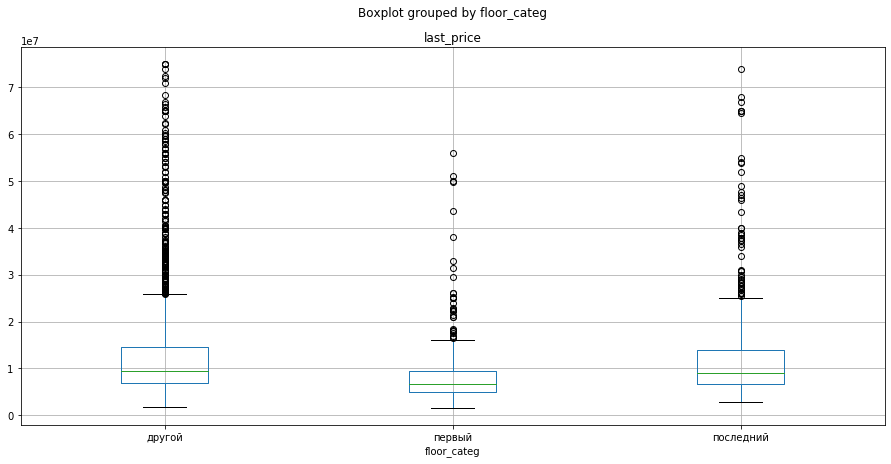

In [157]:
real_est_center.boxplot(column = 'last_price', by='floor_categ', figsize = (15, 7))

Наблюдаем ту же зависимость, что и для всей выборки: медианное значение стоимости квартир (7 млн р.) на первом этаже уступает аналогичным показателям для всех других этажей (около 10 млн р). Межквартильный размах квартир на первом этаже более узкий и принимает более низкие значения (примерно от 6 до 10 млн р.), в то время как для квартир на всех остальных этажах - от 7 до 15 млн р. Медиана и межквартильный размах квартир на последнем этаже практически не отличаются от аналогичных показателей квартир на других этажах.

В целом в центральной зоне квартиры на первом этаже уступают по стоимости квартирам на любом другом этаже.

---

Построим диаграммы размаха для **last_price** по всем возможным категориям переменной **publ_weekday**:

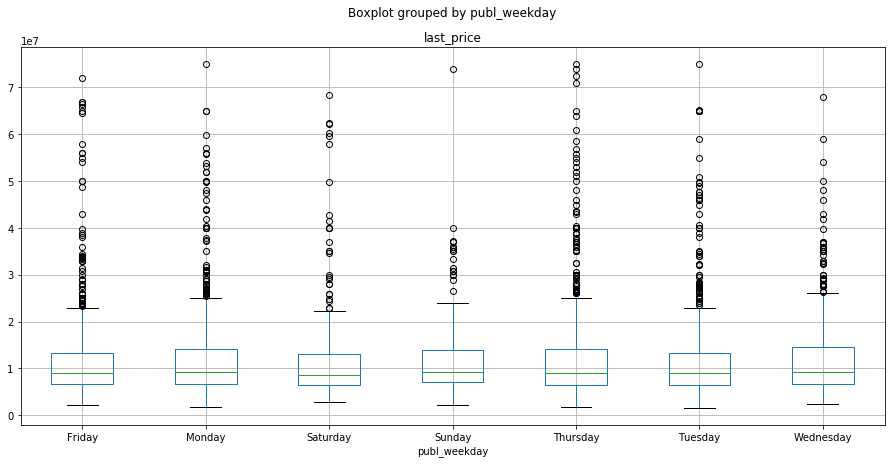

In [158]:
real_est_center.boxplot(column = 'last_price', by='publ_weekday', figsize = (15, 7))

Медианные значения и межквартильный размах цен на квартиру практически не зависят от дня публикации сообщения (низкий ценовой диапазон). Объявления о самых дорогих квартирах вообще не публикуются по воскресеньям (всего одно объявление с ценой более 40 млн р.) и реже по субботам. Чаше всего объявления о дорогих квартирах размещаются по четвергам.

Зависимость цены от дня недели публикации сообщения носит одинаковый характер как для всей выборки, так и для центральной зоны. 

Построим диаграммы размаха для **last_price** по всем возможным категориям переменной **publ_month**:

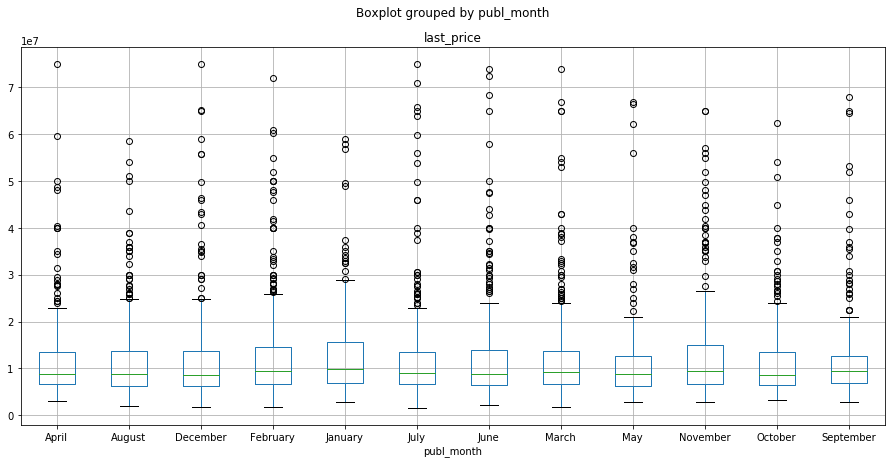

In [159]:
real_est_center.boxplot(column = 'last_price', by='publ_month', figsize = (15, 7))                                                                      

Зависимость медианного значения от месяца публикации объявления незначительна. Чуть выше оно в осенне-зимний сезон: в сентябре, ноябре, январе и феврале.

Что касается продажи дорогих квартир, то, как и в случае с полной выборкой, объявлений наблюдается меньше в январе и мае (вероятно из-за каникул).

---

Построим диаграммы размаха для **last_price** по всем возможным категориям переменной **publ_year**:

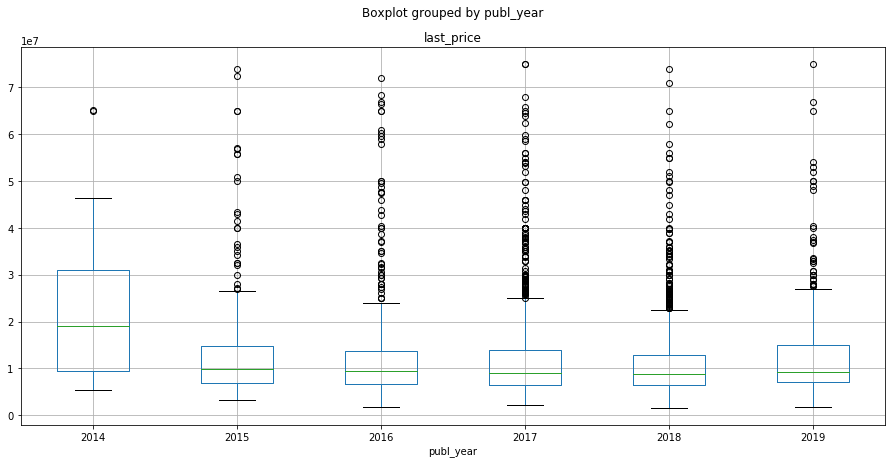

In [160]:
real_est_center.boxplot(column = 'last_price', by='publ_year', figsize = (15, 7))   

График с объявлениями за 2014 г. отличается по виду из-за малого количества объявлений в 2014 г. В последующие годы медианное значение практически не изменялась, в т.ч. в 2019 (в отличие от общей выборки, где медианная цена выросла).

Количество дорогих квартир, выставленных на продажу, тоже сократилось в 2019 г.

**Вывод**

В выборке квартир, расположенных в центральной зоне, на стоимость жилья из рассмотренных факторов в первую очередь влияет его площадь (коэффициент корреляции 0,70). В основном взаимосвязь прослеживается между относительно недорогими для центра квартирами (до 30 млн р.) площадью до 200 кв.м.

Также цена квартиры зависит от этажа, на котором она расположена. Относительно недорогое жилье на первых этажах будет стоить меньше, чем на любых других. Для квартир на последних этажах аналогичной зависимости не выявлено.

Существует положительная средняя взаимосвязь (коэффициент корреляции 0,40) между недорогими квартирами и количеством комнат до 5. Для многокомнатных квартир зависимость прослеживается гораздо слабее.

Стоимость основного объема жилья (примерно до 25 млн р.) практически не коррелирует ни с днем, ни с годом публикации сообщения. Однако есть слабая зависимость от сезона: медианное значение несколько выше в сентябре, ноябре, январе и феврале. 

При этом объявления о продаже дорогостоящих квартир реже публикуются, когда люди отдыхают: по выходным (особенно воскресеньям), а также в январе, мае и августе.

Основные выявленные отличия между всей выборкой и квартирами в центральной зоне следующие:

- распределение цены примерно одинаково, но на квартиры в центральной зоне они выше. Мода для общей выборки - 3 млн р., для центральной зоны - 7 млн р.
- гистограмма площади квартир в центральной зоне более пологая, то есть принимаемые значения более вариативны;
- для центральной зоны больше характерна продажа двух- и трехкомнатных квартир, а для всей выборки - одно- и двухкомнатных. Относительная доля многокомнатных квартир (4 и более) по ценнтральной выборке значительно выше;
- потолки в квартирах в центре города выше (3 м против 2,5 м по общей выборке); доля квартир с высокими потолками в центре существенно больше, чем по городу в целом;
- зависимость цены квартиры от высоты потолков в центре слабая; в целом по выборке она выше;
- имеет место слабая зависимость цены квартиры в центре от сезона публикации объявления: медианное значение несколько выше в сентябре, ноябре, январе и феврале. По общей выборке такой зависимости не выявлено.
- медианное значение стоимости квартир в центральной зоне, выставленных на продажу в 2019 г, не изменилось, а по общей выборке увеличилось.


### Шаг 5. Общий вывод <a name="conclusion"></a>

Проведенное исследование позволяет сделать следующие заключения.

Стоимость квартир в Санкт-Петербурге и расположенных рядом населенных пунктах составляет в общей массе 700 000 - 10 000 000 р, общая площадь принимает значения от 25 до 100 кв. м. В типичных квартирах от 1 до 3 комнат, а высота потолков в квартирах лежит в диапазоне от 2,5 до 3 м. Средняя стоимость 1 кв. метра жилья - 99 426 р.

Среднее время продажи квартиры - 95 дней. Быстрой можно считать продажу до 45 дней, а необычно долгой - свыше 232 дней.

Самая высокая положительная корреляция (коэффициент корреляции 0,77) присутствует между стоимостью квартиры и ее общей площадью, причем в основном для недорогих (до 20 млн р) квартир площадью до 130 кв.м. Связь стоимости с количеством комнат (коэффициент корреляции 0,48) и высотой потолков (коэффициент корреляции 0,49) можно оценить как среднюю. Они тоже выражены сильнее для квартир стоимостью до 20 млн р.

Также цена квартиры довольно сильно зависит от того, на первом ли этаже она находится. Относительно недорогое жилье на первых этажах будет стоить меньше, чем на других. Для квартир на последних этажах аналогичной зависимости не выявлено.

Связь между стоимостью квартиры и расстоянием до центра можно охарактеризовать как не очень сильную и отрицательную (коэффициент корреляции -0,24): чем больше расстояние от центра, тем ниже цена. 

Стоимость основного массы недорогого жилья (до 12 млн р.) практически не коррелирует ни с днем, ни с месяцем, ни с годом публикации сообщения. При этом объявления о продаже дорогостоящих квартир реже публикуются, когда люди отдыхают: по выходным (особенно воскресеньям), а также в январе, мае и августе.

С 2016 г. медианная стоимость квартир год год от года оставалась примерно на одном и том же уровне (около 5 млн р.). Лишь в 2019 г. наблюдался ее прирост (примерно на 0,3 млн р.), а количество дорогих квартир, выставленных на продажу, напротив, сократилось, вероятно, под влиянием экономического кризиса.

Больше всего объявлений о продаже было опубликовано про квартиры в следующих населенных пунктах: Санкт-Петербург, Мурино, Шушары, Всеволожск, Пушкин, Колпино, Парголово, Гатчина, Кудрово, Выборг. Среди них по средней цене за 1 кв. метр жилья лидирует Санкт-Петербург (113 023 р.), замыкает десятку Выборг (58 142 р.).

Можно выделить так называемую центральную зону - жилье, находящееся в радиусе не более чем 7 км от центра Санкт-Петербурга. Выбор границы обусловлен довольно резким падением стоимости 1 кв. м. жилья за ее пределами.

Основные отличия, выявленные между всей выборкой и квартирами в центральной зоне, следующие:

- распределение цен примерно одинаково, но на квартиры в центральной зоне они выше. Мода для общей выборки - 3 млн р., для центральной зоны - 7 млн р.
- для центральной зоны больше характерна продажа двух- и трехкомнатных квартир, а для всей выборки - одно- и двухкомнатных. Относительная доля многокомнатных квартир (4 и более) по ценнтральной выборке значительно выше;
- потолки в квартирах в центре города выше (3 м против 2,5 м по общей выборке); доля квартир с высокими потолками в центре существенно больше, чем по городу в целом;
- зависимость цены квартиры от высоты потолков в центре слабая; в целом по выборке она выше;
- имеет место слабая зависимость цены квартиры в центре от сезона публикации объявления: медианное значение несколько выше в сентябре, ноябре, январе и феврале. По общей выборке такой зависимости не выявлено.
- медианное значение стоимости квартир в центральной зоне, выставленных на продажу в 2019 г, не изменилось, а по общей выборке увеличилось.


Но основани вышеприведенных закономерностей заказчику, собирающемуся построить аналитическую систему для контроля над мошеннической деятельностью при публикации объявлений о продаже квартир, можно посоветовать обратить особое внимание на следующие детали.

Объявление размещено слишком давно (более 232 дней назад) или наоборот, рано снято с сайта (до 45 дней): оно может оказаться просто приманкой, чтобы потенциальный покупатель откликнулся и перезвонил мошенникам, собирающим базу клиентов, которая потом сливается риелторам. Также долго висящие объявления могут содержать заведомо не соответствующие реальности параметры квартиры.

Объявление содержит необъяснимо низкую цену на квартиру площадью до 130 кв.м. Поскольку наблюдается высокая положительная связь между указанными параметрами, небольшая стоимость (ниже 5 млн р) может быть сигналом о том, что с квартирой не все в порядке. Так, известны схемы, когда жилье специально выставляется по привлекательной цене для быстрого поиска покупателя, а после сделки выясняется, что хозяин квартиры оказывается недееспособным, или объявляется собственник, который был временно выписан из квартиры, или вообще квартира продается по поддельным документам. Сделка в этом случае признается недействительной. Основной маркер подобных афер - низкая стоимость квартиры. Еще одним косвенным признаком заниженной стоимости квартиры является ее несоответствие другим факторам, коррелирующим с ценой, - количеству комнат и высоте потолков, а также отсутствию маркера о расположении квартиры на первом этаже.

Наконец, на рынке недвижимости имеет место обман в части недостоверного адреса квартиры, когда покупателя приводят осмотреть одну квартиру, а в документах указывают другой адрес. Здесь мошеннические объявления может помочь отсеять параметр расстояния до центра города, который также коррелирует с ценой на квартиру.
